# 机器学习基础

> [Scikit-Learn 官方文档](https://scikit-learn.org/)

- **有监督学习(supervised learning)**: 可以训练带标签的数据以预测新数据标签的模型
    - **分类(classification)**: 可以预测两个或多个离散分类标签的模型(***预测离散标签***)
    - **回归(regression)**: 可以预测连续标签的模型(***预测连续标签***)
- **无监督学习(unsupervised learning)**: 识别无标签数据结构的模型
    - **聚类(clustering)**: 检测、识别数据显著组别的模型(***为无标签数据添加标签***)
    - **降维(dimensionality reduction)**: 从高维数据中检测、识别低维数据结构的模型(***推断无标签数据的结构***)
- **半监督学习(semi-supervised learning)**: 在数据***标签不完整***时使用

## 数据表示(Data Representation)
- 数据表: 二维网格数据, 行表示样本, 列表示特征
    - 行: 样本(samples), 样本数(n_samples)
    - 列: 特征(features), 列数(n_features)
    - 特征矩阵(features matrix): 变量 X (n_samples*n_features)
    - 标签/目标数组: 因变量 y, 一般是一维数组, 长度为 n_samples

- Scikit-Learn 数据表布局:

![特征矩阵和标签的布局](.\\figures\\特征矩阵和标签的布局.jpg)


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # 

In [3]:
plt.rcParams['font.sans-serif'] = ['SimSun'] # 解决中文显示问题
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

In [4]:
from sklearn import datasets # 数据集

In [63]:
iris = sns.load_dataset('iris') # 鸢尾花数据集
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [65]:
sns.set() # 设置绘图风格

c:\programdata\miniconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


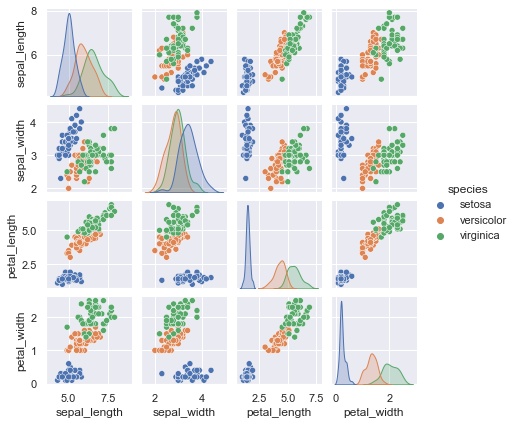

In [66]:
sns.pairplot(iris, hue="species", size=1.5)

In [67]:
## 抽取特征矩阵和标签
X_iris = iris.drop("species", axis=1)
print(X_iris.shape)
y_iris = iris["species"]
print(y_iris.shape)

(150, 4)
(150,)


## Scikit-Learn 的评估器 API
- 设计原则: 统一性, 内省, 限制对象层级, 函数组合, 明智的默认值

### API 基础
Scikit-Learn 评估器API 的常用步骤如下所示(后面介绍的示例都是按照这些步骤进行的)  
1. **选择模型类**: 通过从 Scikit-Learn 中导入适当的评估器类，选择模型类
2. **超参数**: 用合适的数值对模型类进行实例化，配置模型超参数(hyperparameter)
3. **特征和标签**: 整理数据，通过前面介绍的方法获取特征矩阵和目标数组
4. **拟合**: 调用模型实例的 fit() 方法对数据进行拟合
5. **应用模型**: 对新数据应用模型(具体的机器学习任务: 分类, 回归, 聚类, 降维): 
    - 在有监督学习模型中, 通常使用 predict() 方法预测新数据的标签
    - 在无监督学习模型中, 通常使用 transform() 或 predict() 方法转换或推断数据的性质
- 超参数: 在模型拟合数据之前必须被确定的参数
    - 我们想要拟合偏移量(即直线的截距)吗？
    - 我们需要对模型进行归一化处理吗？
    - 我们需要对特征进行预处理以提高模型灵活性吗？
    - 我们打算在模型中使用哪种正则化类型？
    - 我们打算使用多少模型组件？

### API 建模步骤

#### 有监督学习示例: 线性回归

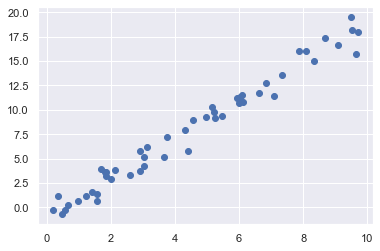

In [24]:
## 线性回归: 为散点数据集拟合一条直线
rng = np.random.RandomState(42)
x = 10*rng.rand(50)
y = 2*x-1+rng.randn(50)
plt.scatter(x, y)
plt.show()

In [25]:
## 1. 选择模型
from sklearn.linear_model import LinearRegression # 线性回归

In [27]:
## 2. 选择模型超参数
model = LinearRegression(fit_intercept=True) # 实例化模型
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False) # 将模型应用到数据

LinearRegression(n_jobs=1)

In [32]:
## 3. 将数据整理成特征矩阵和目标数组(标签)
X = x[:,None] # 将一维数组整理成 [n_samples*n_features] 形式

In [33]:
## 4. 拟合
## Scikit-Learn 中, 所有通过 fit() 方法获得的模型参数都带一条下划线
model.fit(X, y) # 拟合数据
print(model.coef_) # 斜率
print(model.intercept_) # 截距

[1.9776566]
-0.903310725531111


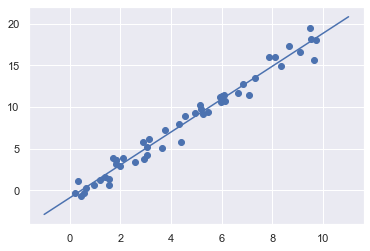

In [35]:
## 5. 预测
x_fit = np.linspace(-1, 11) # 生成预测样本
X_fit = x_fit[:,None] # 将数据整理成 [n_samples*n_features] 形式
y_fit = model.predict(X_fit) # 预测

## 可视化原始数据和拟合结果
plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

#### 有监督学习示例: 鸢尾花数据分类 - 高斯朴素贝叶斯(Gaussian naive Bayes)

> 高斯朴素贝叶斯方法速度很快, 而且不需要选择超参数, 所以通常很**适合作为初步分类手段**, 在借助更复杂的模型进行优化之前使用  


In [68]:
## 分割数据集: training set & testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_iris, y_iris, 
                                                 random_state=1)

In [69]:
from sklearn.naive_bayes import GaussianNB # 1.选择模型类
model = GaussianNB() # 2.初始化模型
model.fit(X_train, y_train) # 3.用模型拟合数据
y_model = model.predict(X_test) # 4.对新数据进行预测

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model) # 验证模型预测结果的准确率

0.9736842105263158

#### 无监督学习示例: 鸢尾花数据降维 - (Principal Component Analysis, PCA)

In [71]:
from sklearn.decomposition import PCA # 1. 选择模型类
model = PCA(n_components=2) # 2. 设置超参数, 初始化模型
model.fit(X_iris) # 3. 拟合, 注意不需要 y 变量
X_2D = model.transform(X_iris) # 4.降维

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


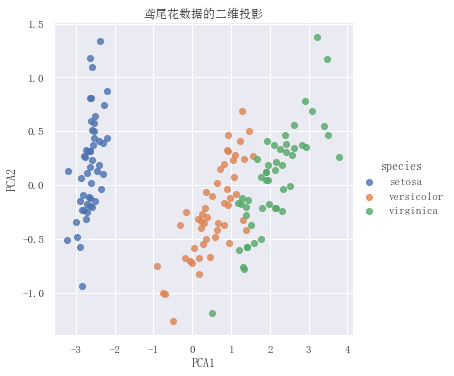

In [83]:
iris["PCA1"] = X_2D[:,0]
iris["PCA2"] = X_2D[:,1]
sns.lmplot("PCA1", "PCA2", hue="species", data=iris, fit_reg=False)
plt.title("鸢尾花数据的二维投影")
plt.show()

#### 无监督学习示例: 鸢尾花数据聚类 - 高斯混合模型(Gaussian mixture model, GMM)

In [85]:
from sklearn.mixture import GaussianMixture as GMM # 1. 选择模型类
model = GMM(n_components=3, 
           covariance_type="full") # 2. 设置超参数, 初始化模型
model.fit(X_iris) # 3. 拟合, 注意不需要 y 变量
y_gmm = model.predict(X_iris) # 4. 确定簇标签

c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


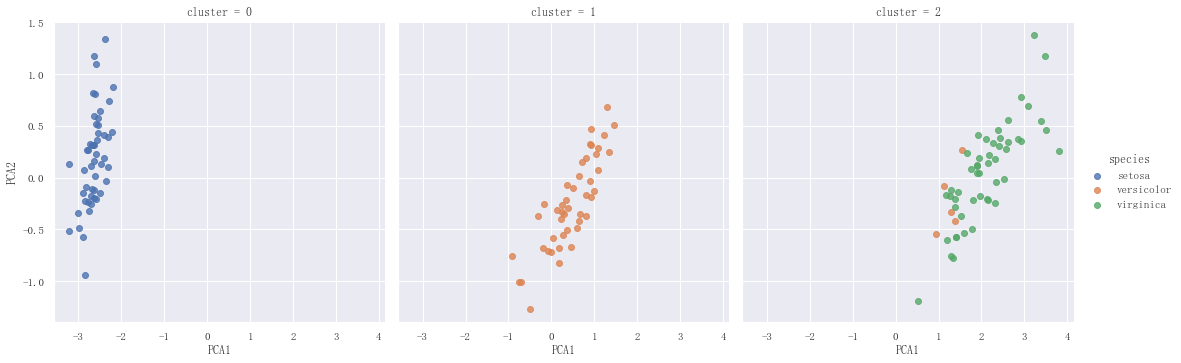

In [87]:
iris["cluster"] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue="species", 
          col="cluster", fit_reg=False)
plt.show()

#### 手写数字识别
- 导入数据-->可视化-->特征选择和标注-->特征处理(标准化,归一化,降维,...)-->模型选择和应用(分类)-->模型评价-->模型修正

In [7]:
## 导入数据
from sklearn.datasets import load_digits # 手写数字数据
digits = load_digits()
digits.images.shape

(1797, 8, 8)

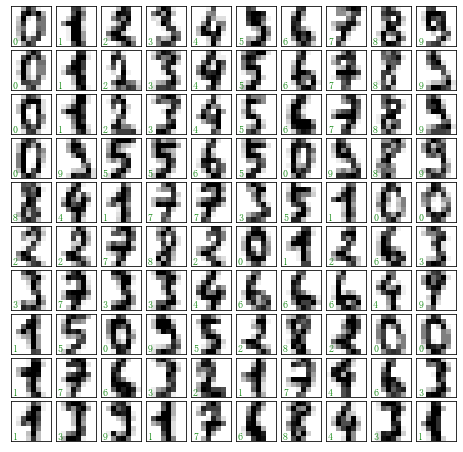

In [8]:
## 对前 100 张图进行可视化
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [9]:
## 特征矩阵 & 标签
X = digits.data # 特征矩阵
y = digits.target # 标签
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


In [10]:
## 降维
from sklearn.manifold import Isomap # 1. 选择模型类
iso = Isomap(n_components=2) # 2. 设置超参数, 初始化模型
iso.fit(digits.data) # 3. 拟合
data_projected = iso.transform(digits.data) # 4. 降维
print(data_projected.shape) # 特征矩阵降到二维

(1797, 2)


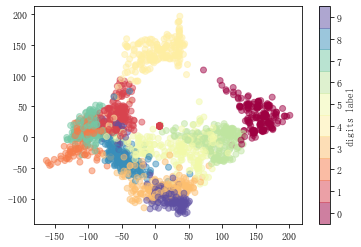

In [11]:
## 可视化降维结果
plt.scatter(data_projected[:,0], data_projected[:,1], c=digits.target, 
           edgecolors=None, alpha=0.5, 
           cmap=plt.cm.get_cmap("Spectral", 10))
plt.colorbar(label="digits label", ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

In [13]:
## 分类
from sklearn.model_selection import train_test_split # 分割数据集
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0) # 分割数据集
from sklearn.naive_bayes import GaussianNB # 高斯朴素贝叶斯
model = GaussianNB()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

In [14]:
## 模型准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8333333333333334

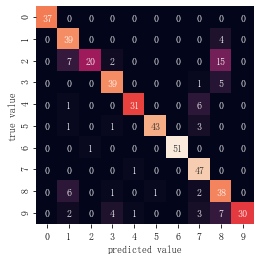

In [15]:
## 混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

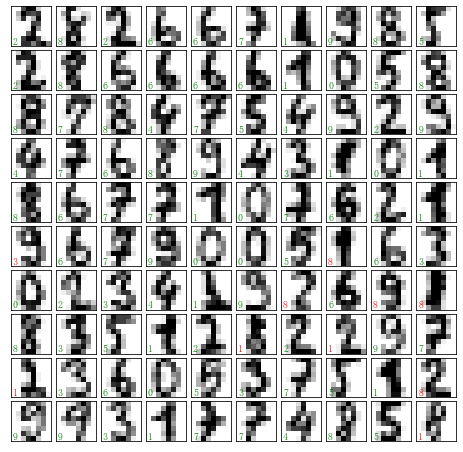

In [18]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
test_images = X_test.reshape(-1,8,8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (y_test[i] == y_model[i]) else 'red')

## 模型选择和验证
> 偏差与方差均衡  

### 处理数据集
- 数据集处理: 二八定律
- 留出集(holdout set)
```py
from sklearn.model_selection import train_test_split
# 每个数据集分一半数据
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
train_size=0.5)
```
- 交叉验证(cross-validation)
```py
from sklearn.model_selection import cross_val_score # 交叉验证
cross_val_score(model, X, y, cv=5)
```

<img style="float: center;" src=".\figures\交叉验证.jpg" width="60%">
<center>Fig. 五轮交叉验证</center>


### 选择最优模型

In [44]:
## 带多项式预处理器的线性回归模型
from sklearn.preprocessing import PolynomialFeatures # 
from sklearn.linear_model import LinearRegression # 线性回归
from sklearn.pipeline import make_pipeline # 

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))


In [45]:
## 生成数据
import numpy as np # 数值计算

def make_data(N, err=1.0, rseed=1):
    # 随机抽样数据
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

(500, 1)


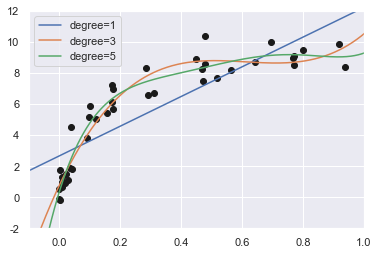

In [48]:
## 用三种多项式回归模型拟合一份数据
import matplotlib.pyplot as plt # 绘图
import seaborn as sns # 
sns.set() # 设置图形样式

X_test = np.linspace(-0.1, 1.1, 500)[:, None] # 整理数据 [n_samples*n_features]
print(X_test.shape)

plt.scatter(X.ravel(), y, color="k")
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label="degree={0}".format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc="best")
plt.show()

### 验证曲线(validation curve)
    - 训练得分肯定高于验证得分。一般情况下，模型拟合自己接触过的数据，比拟合没接触过的数据效果要好。
    - 使用复杂度较低的模型（高偏差）时，训练数据往往欠拟合，说明模型对训练数据和新数据都缺乏预测能力。
    - 而使用复杂度较高的模型（高方差）时，训练数据往往过拟合，说明模型对训练数据预测能力很强，但是对新数据的预测能力很差。
    - 当使用复杂度适中的模型时，验证曲线得分最高。说明在该模型复杂度条件下，偏差与方差达到均衡状态。
    
<img style="float: center;" src=".\figures\验证曲线.jpg" width="60%">
<center>Fig. 验证曲线</center>


c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


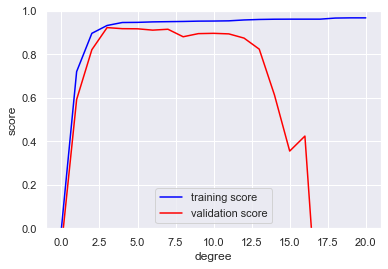

In [57]:
## 验证曲线
from sklearn.model_selection import validation_curve # 验证曲线
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 
                                          "polynomialfeatures__degree", 
                                          degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color="blue", label="training score")
plt.plot(degree, np.median(val_score, 1), color="red", label="validation score")
plt.legend(loc="best")
plt.ylim(0, 1)
plt.xlabel("degree")
plt.ylabel("score")
plt.show()

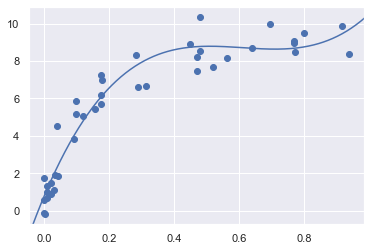

In [58]:
## 从验证曲线中可以看出, 偏差与方差均衡性最好的是三次多项式
## 将模型画在原始数据上
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.show()

### 学习曲线(learning curve)
- 影响模型效果的因素:
    - 模型复杂度
    - 训练数据集规模

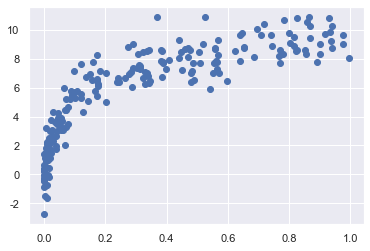

In [59]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)
plt.show()

c:\programdata\miniconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass param_name=polynomialfeatures__degree, param_range=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


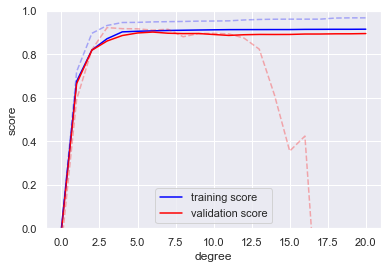

In [71]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2, 
                                            'polynomialfeatures__degree', 
                                            degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue', 
         label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, 
         linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, 
         linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')
plt.show()

> 通过观察验证曲线的变化趋势，可以发现有两个影响模型效果的因素：模型复杂度和训练数据集的规模  

- 学习曲线: 
    - 特定复杂度的模型对较小的数据集容易过拟合: 此时训练得分较高, 验证得分较低
    - 特定复杂度的模型对较大的数据集容易欠拟合: 随着数据的增大, 训练得分会不断降低, 而验证得分会不断升高
    - 模型的验证集得分永远不会高于训练集得分: 两条曲线一直在靠近, 但永远不会交叉

<img style="float: center;" src=".\figures\学习曲线.jpg" width="60%">
<center>Fig. 学习曲线</center>

> 随着样本量的增加, 分数会收敛到定值, 此时, 改变性能的唯一方法就是换模型(通常换成更复杂的模型)  

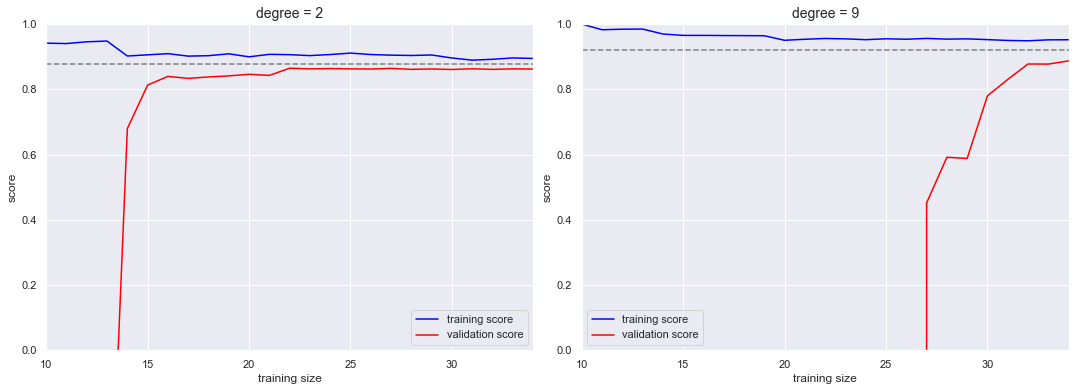

In [70]:
## 低复杂度（左）和高复杂度（右）学习曲线
from sklearn.model_selection import learning_curve # 学习曲线
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), 
                                         X, y, cv=7, 
                                         train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', 
                 linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')
plt.show()

> - 当你的学习曲线已经收敛时（即训练曲线和验证曲线已经贴在一起），再增加训练数据也不能再显著改善拟合效果！  
> - 提高收敛得分的唯一办法就是换模型（通常也是更复杂的模型）。如右图所示：采用复杂度更高的模型之后，虽然学习曲线的收敛得分提高了（对比虚线所在位置），但是模型的方差也变大了（对比训练得分与验证得分的差异即可看出）。如果我们为复杂度更高的模型继续增加训练数据，那么学习曲线最终也会收敛。  

### 网格搜索

In [73]:
## 自动化网格搜索的最优拟合模型
from sklearn.model_selection import GridSearchCV # 网格搜索
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y)
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

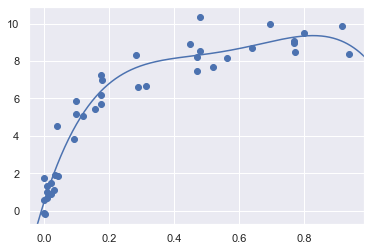

In [75]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)
plt.show()

## 特征工程(feature engineering)
- **特征工程**: 找到与问题有关的任何信息, 把它们转换成特征矩阵的数值
- **向量化**: 提高模型复杂度的衍生特征和处理缺失数据的填充方法

### 分类特征
- 编码: 独热编码(one-hot): 可以很好的增加维数, 但是, 分类枚举值过多时容易导致维度灾难

In [76]:
data = [
{'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
{'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
{'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
{'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [77]:
from sklearn.feature_extraction import DictVectorizer #
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [78]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

- 采用稀疏矩阵解决 one-hot 编码导致的维度灾难

In [79]:
vec = DictVectorizer(sparse=True, dtype=int) # 使用稀疏矩阵
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### 文本特征
- 词频统计: 统计每词出现的次数

In [80]:
sample = ['problem of evil','evil queen','horizon problem']

In [81]:
from sklearn.feature_extraction.text import CountVectorizer # 

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [82]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0

- TF-IDF(term frequency-inverse document frequency, 词频逆文档频率)
    - 原始的单词统计会让一些常用词聚集太高的权重, 在分类算法中这样并不合理, 解决这个问题的方法就是通过单词在文档中出现的频率来衡量其权重

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer # 词频逆文档频率
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000

### 图像特征
[Scikit-Image](https://scikit-image.org)

### 衍生特征
- 基函数回归(basis function regression)
    - 对数据进行变换, 并增加额外的特征来提升模型的复杂度

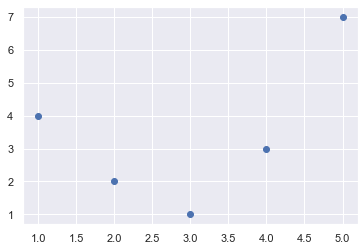

In [88]:
import numpy as np # 数值计算
import matplotlib.pyplot as plt # 可视化

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)
plt.show()

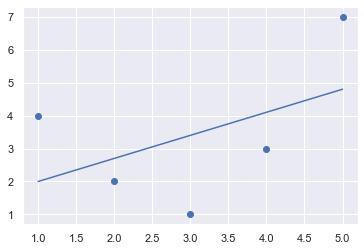

In [89]:
## 使用线性回归拟合
from sklearn.linear_model import LinearRegression # 线性回归
X = x[:,None]
model = LinearRegression().fit(X, y)
y_fit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, y_fit)
plt.show()

In [91]:
## 在数据中增加多项式特征
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


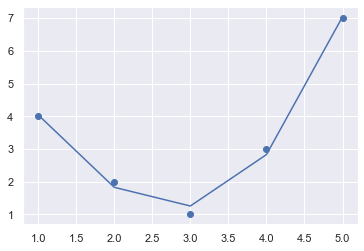

In [92]:
## 对数据衍生的多项式特征线性拟合
model = LinearRegression().fit(X2, y)
y_fit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, y_fit)
plt.show()

> 基函数是核方法(kernel method)技术的驱动力之一  

### 缺失值填充

In [108]:
from numpy import nan
X = np.array([[nan,0,3],
              [3,7,9],
              [3,5,2],
              [4,nan,6],
              [8,8,1]])
y = np.array([14,16,-1,8,-5])

In [109]:
from sklearn.impute import SimpleImputer # 缺失值处理
imp = SimpleImputer(strategy="mean")
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

### 特征管道: pipeline & make_pipeline

In [110]:
from sklearn.pipeline import make_pipeline # 特征管道

model = make_pipeline(SimpleImputer(strategy="mean"), # 用均值填充缺失值
                      PolynomialFeatures(degree=2), # 将衍生特征转换为二次方
                      LinearRegression()) # 拟合线性回归模型
model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## 朴素贝叶斯分类(naive Bayes classifiers)
> 朴素贝叶斯模型是一组非常简单快速的分类算法，通常适用于维度非常高的数据集。因为运行速度快，而且可调参数少，因此非常适合为分类问题提供快速粗糙的基本方案。  

- 贝叶斯分类: 望确定一个具有某些特征的样本属于某类标签的概率$$P(L|\text{特征})=\frac{P(\text{特征}|L)P(L)}{P(\text{特征})}$$
- 优点:
    - 训练和预测的速度非常快
    - 直接使用概率预测
    - 通常很容易解释
    - 可调参数（如果有的话）非常少
- 应用场景:
    - 假设分布函数与数据匹配（实际中很少见）
    - 各种类型的区分度很高，模型复杂度不重要
    - 非常高维度的数据，模型复杂度不重要

In [12]:
## 导包
import numpy as np # 数值计算
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # 可视化
sns.set() # 设置图形样式

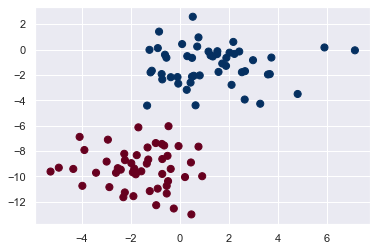

In [13]:
## 导入训练数据
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")
plt.show()

- 高斯朴素贝叶斯模型可视化图

<img style="float: center;" src=".\figures\高斯朴素贝叶斯模型可视化图.jpg" width="60%">
<center>高斯朴素贝叶斯模型可视化图</center>


> 图中的椭圆曲线表示每个标签的高斯生成模型，越靠近椭圆中心的可能性越大。通过每种类型的生成模型，可以计算出任意数据点的似然估计（likelihood）P ( 特征 | L1)，然后根据贝叶斯定理计算出后验概率比值，从而确定每个数据点可能性最大的标签。  

### 高斯朴素贝叶斯(Gaussian naive Bayes)
- 假设每个标签的数据都服从简单的高斯分布

In [14]:
## 高斯生成模型
from sklearn.naive_bayes import GaussianNB # Gauss 朴素贝叶斯
model = GaussianNB()
model.fit(X, y);

In [15]:
## 生成一些新数据来预测标签
rng = np.random.RandomState(0)
X_new = [-6,-14] + [14,18] * rng.rand(2000, 2)
y_new = model.predict(X_new)

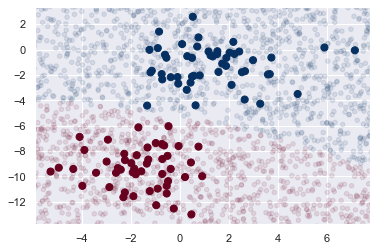

In [16]:
## 绘制决策边界
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="RdBu")
lim = plt.axis()
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, s=20, cmap="RdBu", alpha=0.1)
plt.axis(lim)
plt.show()

In [17]:
## 计算样本属于某个标签的概率
y_prob = model.predict_proba(X_new)
y_prob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

### 多项式朴素贝叶斯(multinomial naive Bayes)

In [71]:
from sklearn.datasets import get_data_home # sklearn.datasets 根目录
print (get_data_home())

C:\Users\kisso\scikit_learn_data


In [61]:
fetch_20newsgroups?

In [72]:
import sys
sys.executable

'c:\\programdata\\miniconda3\\python.exe'

In [79]:
## 导入网络新闻组语料库
from sklearn.datasets import fetch_20newsgroups # 新闻数据

data = fetch_20newsgroups()
data.target_names

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [ ]:
## 只选择四类新闻, 下载训练集和测试集
categories = ['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset="train", categories=categories)
test = fetch_20newsgroups(subset="test", categories=categories)
print(train.data[5])

In [ ]:
# 模型构建, 应用, 预测, 评估
from sklearn.feature_extraction.text import TfidfVectorizer # 词频逆文档频率
from sklearn.naive_bayes import MultinomialNB # 多项式朴素贝叶斯
from sklearn.pipeline import make_pipeline # 管道特征

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

model.fit(train.data, train.target) # 应用模型
labels = model.predict(test.data) # 预测标签

from sklearn.metrics import confusion_matrix # 混淆矩阵
mat = confusion_matrix(test.target, labels)
sns.hearmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

In [ ]:
predict_category('discussing islam vs atheism')

In [ ]:
predict_category('determining the screen resolution')

## 线性回归(linear regression)

### 简单线性回归

In [26]:
import numpy as np # 科学计算
import matplotlib.pyplot as plt # 可视化
import seaborn as sns #
sns.set() # 设置图形样式

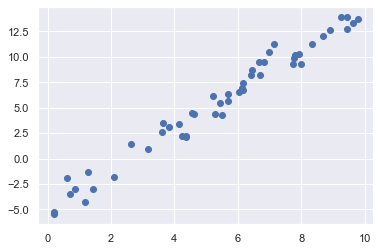

In [27]:
rng = np.random.RandomState(0)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)
plt.show()

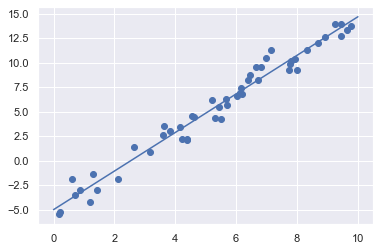

Model slope: 1.9692732947309528
Model intercept: -5.0072100841302785


In [28]:
from sklearn.linear_model import LinearRegression # 线性回归
model = LinearRegression(fit_intercept=True) # 拟合截距

model.fit(x[:,None], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = model.predict(x_fit[:,None])

plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

# 打印模型参数
print("Model slope:", model.coef_[0]) # 斜率
print("Model intercept:", model.intercept_) # 截距

### 基函数回归
- 转换函数$f_n()$: $$x_n = f_n(x)$$

#### 多项式基函数

In [29]:
from sklearn.preprocessing import PolynomialFeatures # 多项式基
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:,None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [30]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

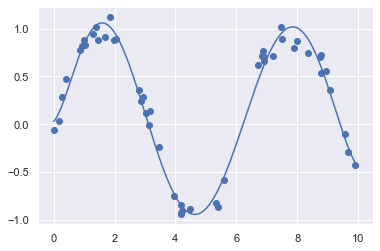

In [31]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = poly_model.predict(x_fit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.show()

#### 高斯基函数

<img style="float: center;" src=".\figures\高斯基函数拟合非线性数据.jpg" width="60%">
<center>高斯基函数拟合非线性数据</center>
    

In [32]:
## Scikit-Learn 并没有内置高斯基函数
## 写一个转换器来创建高斯基函数
## 仿照 Scikit-Learn 源码: Scikit-Learn 的转换器都是用 Python 类实现的
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """一维输入均匀分布的高斯特征"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # 在数据区间中创建N个高斯分布中心
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
        self.width_, axis=1)

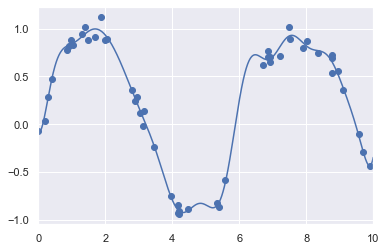

In [33]:
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:,np.newaxis], y)

x_fit = np.linspace(0, 10, 1000)
y_fit = gauss_model.predict(x_fit[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_fit, y_fit)
plt.xlim(0, 10)
plt.show()

#### 正则化
- 线性回归模型中引入基函数会让模型变得更加灵活, 但是也很容易造成过拟合

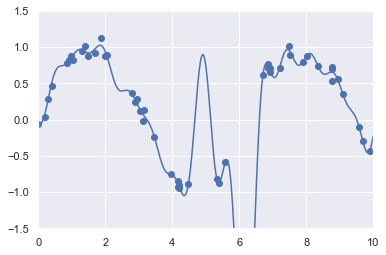

In [34]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:,np.newaxis], y)

plt.scatter(x, y)
plt.plot(x_fit, model.predict(x_fit[:,np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
plt.show()

In [45]:
## 将高斯基函数的系数画出来, 看看过拟合的原因
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:,np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(x_fit, model.predict(x_fit[:,np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        ax[1].plot(model.steps[0][1].centers_,
                   model.steps[1][1].coef_)
        ax[1].set(xlabel='basis location',
                  ylabel='coefficient',
                  xlim=(0, 10))
    plt.show()
    return None

In [49]:
from dis import dis # 反汇编
dis(basis_plot)

  3           0 LOAD_GLOBAL              0 (plt)
              2 LOAD_ATTR                1 (subplots)
              4 LOAD_CONST               1 (2)
              6 LOAD_CONST               2 (True)
              8 LOAD_CONST               3 (('sharex',))
             10 CALL_FUNCTION_KW         2
             12 UNPACK_SEQUENCE          2
             14 STORE_FAST               2 (fig)
             16 STORE_FAST               3 (ax)

  4          18 LOAD_FAST                0 (model)
             20 LOAD_METHOD              2 (fit)
             22 LOAD_GLOBAL              3 (x)
             24 LOAD_CONST               0 (None)
             26 LOAD_CONST               0 (None)
             28 BUILD_SLICE              2
             30 LOAD_GLOBAL              4 (np)
             32 LOAD_ATTR                5 (newaxis)
             34 BUILD_TUPLE              2
             36 BINARY_SUBSCR
             38 LOAD_GLOBAL              6 (y)
             40 CALL_METHOD              2
     

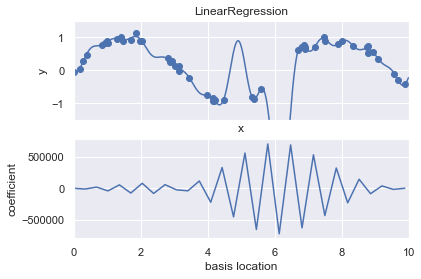

In [46]:
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model, title="LinearRegression")
# LinearRegression()

> coefficient 显示了每个位置上基函数的振幅  
> 当基函数重叠的时候，通常就表明出现了过拟合: 相邻基函数的系数相互抵消。这显然是有问题的，如果对较大的模型参数进行惩罚(penalize), 从而抑制模型剧烈波动，应该就可以解决这个问题了。这个惩罚机制被称为**正则化**(regularization), 有几种不同的表现形式。  

##### 罚函数

###### 岭回归($L_2$ 范数正则化, ridge regression)
- 处理方法是对模型系数平方和($L_2$ 范数)进行惩罚: $$P = \alpha\sum^N_{n=1}\theta^2_n$$
$\alpha$ 为自由参数, 用来控制惩罚力度

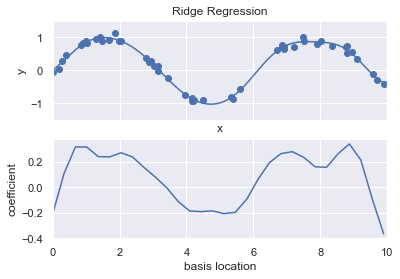

In [40]:
## 岭回归（L2 范数）正则化处理过度复杂的模型
from sklearn.linear_model import Ridge # 岭回归
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title="Ridge Regression")

> - 参数 $\alpha$ 是控制最终模型复杂度的关键.  
> - 如果 $\alpha\rightarrow 0$, 那么模型就恢复到标准线性回归结果; 如果 $\alpha\rightarrow \infty $, 那么所有模型响应都会被压制.  
> - 岭回归的一个重要优点是, 它可以非常高效地计算--因此相比原始的线性回归模型, 几乎没有消耗更多的计算资源.  

###### Lasso 正则化($L_1$ 范数)
- 处理方法是对模型系数绝对值的和($L_1$ 范数)进行惩罚: $$P = \alpha\sum^N_{n=1}|\theta_n|$$
Lasso 正则化倾向于构建稀疏模型, 也就是说, 它更喜欢将模型系数设置为 0.

c:\programdata\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.002135815870490665, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


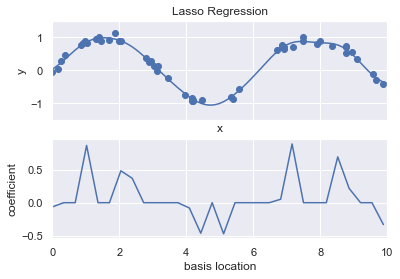

In [47]:
from sklearn.linear_model import Lasso # Lasso 回归
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title="Lasso Regression")

#### 案例: 预测自行车流量

In [50]:
# !curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:03 --:--:--     0
100  191k    0  191k    0     0  48935      0 --:--:--  0:00:04 --:--:-- 41897
100  751k    0  751k    0     0   150k      0 --:--:--  0:00:05 --:--:--  183k
100 2110k    0 2110k    0     0   351k      0 --:--:--  0:00:06 --:--:--  431k
100 3886k    0 3886k    0     0   555k      0 --:--:--  0:00:07 --:--:--  812k
100 4563k    0 4563k    0     0   651k      0 --:--:--  0:00:07 --:--:-- 1081k


In [53]:
import numpy as np # 科学计算
import pandas as pd # 数据分析
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # 可视化

In [56]:
sns.set() # 设置绘图样式
data_path = ".\\datasets\\"

In [57]:
df = pd.read_csv(data_path+"FremontBridge.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143630 entries, 0 to 143629
Data columns (total 4 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Date                          143630 non-null  object 
 1   Fremont Bridge Total          143608 non-null  float64
 2   Fremont Bridge East Sidewalk  143608 non-null  float64
 3   Fremont Bridge West Sidewalk  143608 non-null  float64
dtypes: float64(3), object(1)
memory usage: 4.4+ MB


In [58]:
df.head()

Date  Fremont Bridge Total  Fremont Bridge East Sidewalk  \
0  11/01/2019 12:00:00 AM                  12.0                           7.0   
1  11/01/2019 01:00:00 AM                   7.0                           0.0   
2  11/01/2019 02:00:00 AM                   1.0                           0.0   
3  11/01/2019 03:00:00 AM                   6.0                           6.0   
4  11/01/2019 04:00:00 AM                   6.0                           5.0   

   Fremont Bridge West Sidewalk  
0                           5.0  
1                           7.0  
2                           1.0  
3                           0.0  
4                           1.0

In [59]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

## 支持向量机(support vector machine, SVM)
- 可应用于分类和回归

In [1]:
## 导包
%matplotlib inline
import numpy as np # 科学计算
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # 
sns.set()

from scipy import stats # 统计学习

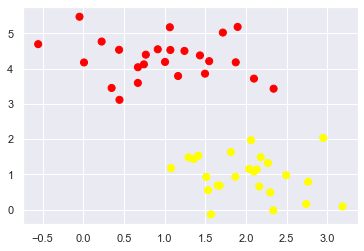

In [2]:
## 生成分类数据
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, 
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plt.show()

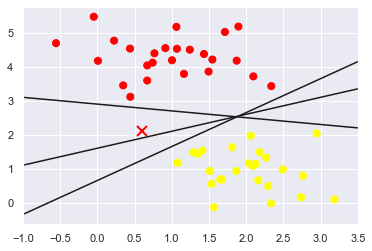

In [3]:
## 三条完美的线性判别分类器
x_fit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plt.plot([0.6], [2.1], "x", color="red", markeredgewidth=2, markersize=10)

for m, b in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:
    plt.plot(x_fit, m*x_fit+b, "-k")
    
plt.xlim(-1, 3.5)
plt.show()

> 虽然这三个不同的分割器都能完美地判别这些样本，但是选择不同的分割线，可能会让新的数据点（例如图中的“X”点）分配到不同的标签。

### 边界最大化
- 支持向量机提供了改进上面问题的方法: 不再画一条细线来区分类型, 而是画一条到最近点边界、有宽度的线条
- 在支持向量机中, 选择边界最大的那条线是模型最优解. 支持向量机其实就是一个**边界最大化评估器**

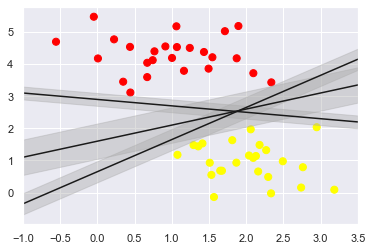

In [4]:
x_fit = np.linspace(-1, 3.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")

for m, b, d in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]:
    y_fit = m*x_fit+b
    plt.plot(x_fit, y_fit, "-k")
    plt.fill_between(x_fit, y_fit-d, y_fit+d, edgecolor="none", color="#AAAAAA", alpha=0.4)
    
plt.xlim(-1, 3.5)
plt.show()

In [5]:
## 构建 SVM
from sklearn.svm import SVC # 支持向量机
model = SVC(kernel="linear", C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
## 绘制决策边界
def plot_svc_decision_func(model, ax=None, plot_support=True):
    """画二维 SVC 的决策函数"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 创建评估模型的网格
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 画决策边界和边界
    ax.contour(X, Y, P, colors='k', 
               levels=[-1,0,1], alpha=0.5,
               linestyles=['--','-','--'])
    
    # 画支持向量
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                   model.support_vectors_[:,1],
                   s=300, linewidth=1, facecolors='none', edgecolors="k")
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    return None
    

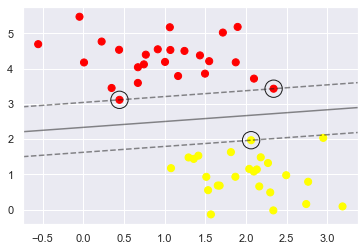

support vectors:
 [[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]


In [7]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_func(model)
plt.show()
print("support vectors:\n", model.support_vectors_)

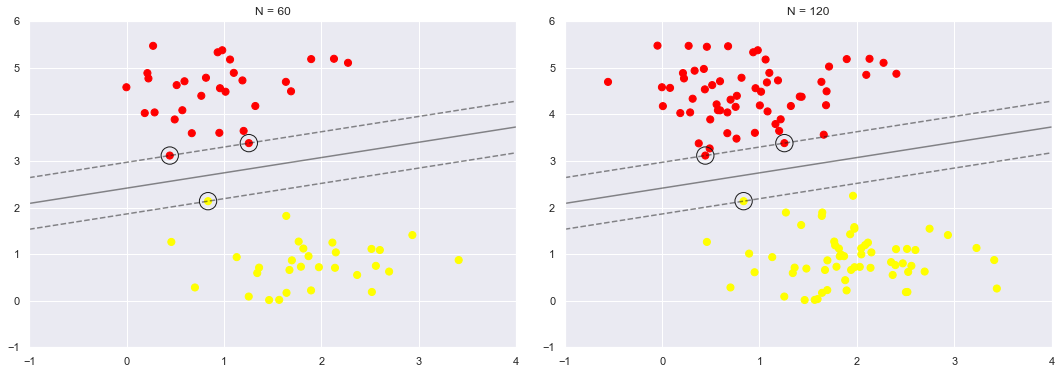

In [8]:
## 分别画出数据集前 60 个点和前 120 个点的拟合结果
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_func(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16,6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60,120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

> - 我们在左图中看到的是前 60 个训练样本的模型和支持向量。在右图中，虽然我们画了前 120 个训练样本的支持向量，但是模型并没有改变：左图中的 3 个支持向量仍然适用于右图。  
> - 这种对远离边界的数据点不敏感的特点正是 SVM 模型的优点之一。  

In [9]:
from ipywidgets import interact, fixed # IPython 交互组件
interact(plot_svm, N=[10,200], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

### 核函数: 处理非线性数据

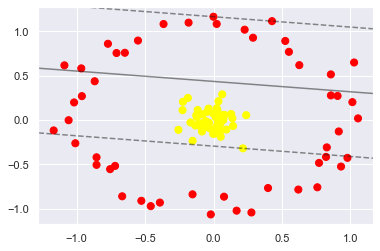

In [19]:
## 用线性分类器处理非线性边界
from sklearn.datasets import make_circles # 引入一些非线性可分的数据
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel="linear").fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_func(clf, plot_support=False)
plt.show()

- 如何将数据投影到高维空间，从而使线性分割器可以派上用场。例如，一种简单的投影方法就是计算一个以数据圆圈（middle clump）为中心的**径向基**函数。

In [11]:
r = np.exp(-(X ** 2).sum(1)) # 径向基函数

In [12]:
## 可以进行线性分割的第三个维度
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90,90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));
# plt.show()

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

- 增加新维度之后，数据变成了线性可分状态。如果现在画一个分割平面，例如 r = 0.7，即可将数据分割。  
- 我们还需要仔细选择和优化投影方式；如果不能将径向基函数集中到正确的位置，那么就得不到如此干净、可分割的结果。通常，选择基函数比较困难，我们需要让模型自动指出最合适的基函数。  
- 一种策略是计算基函数在数据集上每个点的变换结果，让 SVM 算法从所有结果中筛选出最优解。这种基函数变换方式被称为核变换，是基于每对数据点之间的相似度（或者核函数）计算的。  

In [13]:
## 使用径向基核函数（RBF）
clf = SVC(kernel="rbf", C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

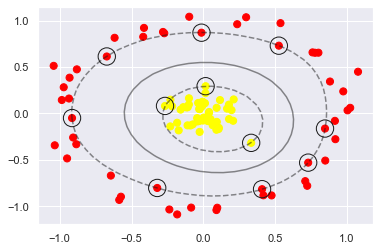

In [14]:
## 核函数化的 SVM 模型拟合数据
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision_func(clf)
plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], 
            s=300, lw=1, facecolor="none")
plt.show()

### 软化边界
- SVM 实现了一些修正因子来“软化”边界
- 边界线的硬度可以通过超参数 C 进行控制。如果 C 很大，边界就会很硬，数据点便不能在边界内“生存”；如果 C 比较小，边界线比较软，有一些数据点就可以穿越边界线。

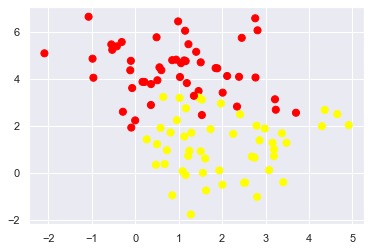

In [15]:
## 有重叠的数据
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

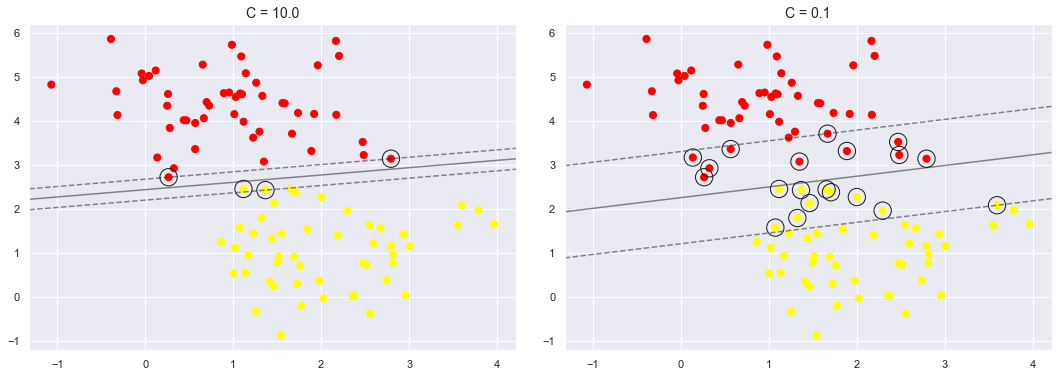

In [17]:
## 不同参数 C 的支持向量机拟合效果
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_func(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

plt.show()

### 案例：人脸识别

In [32]:
## 获取人脸数据
from sklearn.datasets import fetch_lfw_people # 人脸数据
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


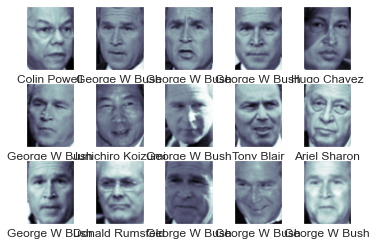

In [33]:
## 画一些人脸，看看需要处理的数据
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [35]:
## 将预处理器和分类器打包成管道
from sklearn.svm import SVC # 支持向量机
from sklearn.decomposition import PCA # 主成分分析
from sklearn.pipeline import make_pipeline # 特征管道

pca = PCA(n_components=150, whiten=True, svd_solver="randomized", random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [39]:
## 将数据集分解成训练集和测试集进行交叉检验
from sklearn.model_selection import train_test_split # 分割数据
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [41]:
## 用网格搜索交叉检验来寻找最优参数组合
from sklearn.model_selection import GridSearchCV # 网格搜索
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 48.6 s
{'svc__C': 10, 'svc__gamma': 0.001}


> 最优参数最终落在了网格的中间位置。如果它们落在了边缘位置，我们可能就需要扩展网格搜索范围，确保最优参数可以被搜索到。

In [42]:
## 对测试集的数据进行预测
model = grid.best_estimator_
yfit = model.predict(Xtest)

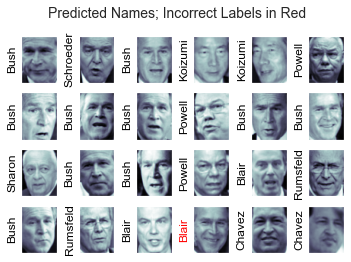

In [43]:
## 将一些测试图片与预测图片进行对比
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
plt.show()

In [44]:
## 打印分类效果报告
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



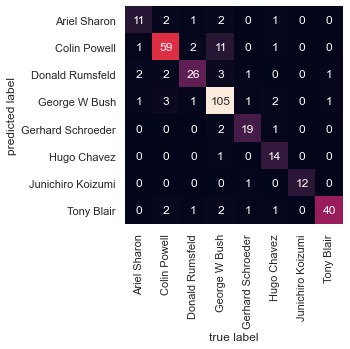

In [45]:
## 画出这些标签的混淆矩阵
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### 总结
- 优点
    - **消耗内存少**：模型依赖的支持向量比较少，说明它们都是非常精致的模型，消耗内存少。
    - **速度快**：一旦模型训练完成，预测阶段的速度非常快。
    - **适应高维数据**：由于模型只受边界线附近的点的影响，因此它们对于高维数据的学习效果非常好——即使训练比样本维度还高的数据也没有问题，而这是其他算法难以企及的。
    - **适应不同类型数据**：与核函数方法的配合极具通用性，能够适用不同类型的数据。
- 缺点
    - **大样本学习成本高**：随着样本量 N 的不断增加，最差的训练时间复杂度会达到 $O(n^3)$；经过高效处理后，也只能达到 $O(n^2)$。因此，大样本学习的计算成本会非常高。
    - **参数 C 难以选择**：训练效果非常依赖于边界软化参数 C 的选择是否合理。这需要通过交叉检验自行搜索；当数据集较大时，计算量也非常大。
    - **结果难以解释**：预测结果不能直接进行概率解释。这一点可以通过内部交叉检验进行评估（具体请参见SVC 的probability 参数的定义），但是评估过程的计算量也很大。

> - 建议在其他简单、快速、调优难度小的方法不能满足需求时，再选择支持向量机。  
> - 如果你的计算资源足以支撑 SVM 对数据集的训练和交叉检验，那么用它一定能获得极好的效果。  

## 决策树和随机森林

### 决策树

In [2]:
%matplotlib inline
import numpy as np # 数值计算
import matplotlib.pyplot as plt # 可视化
import seaborn as sns # 
sns.set()

如果你想建一棵决策树来判断旅行时遇到的一只动物的种类，你就可以提出如图所示的问题。

<img style="float: center;" src=".\figures\二叉决策树.jpg" width="60%">
<center>Fig. 二叉决策树</center>


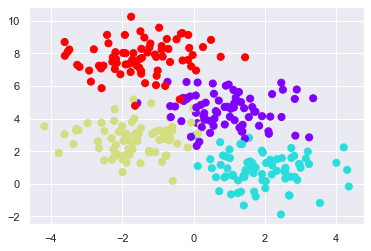

In [3]:
## 随机生成一组四个标签的数据
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='rainbow')
plt.show()

- 决策树分割数据的过程

<img style="float: center;" src=".\figures\决策树分割数据的过程.jpg" width="60%">
<center>Fig. 决策树分割数据的过程</center>


In [4]:
## 构建决策树分类器
from sklearn.tree import DecisionTreeClassifier # 决策树分类器
tree = DecisionTreeClassifier().fit(X, y)

In [5]:
## 可视化分类结果
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # 画出训练数据
    ax.scatter(X[:,0], X[:,1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 用评估器拟合数据
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 为结果生成彩色图
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)
    
    ax.set(xlim=xlim, ylim=ylim)
    plt.show()

<ipython-input-5-eae00855de8b>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


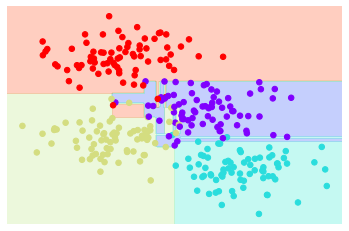

In [6]:
visualize_classifier(DecisionTreeClassifier(), X, y)

In [7]:
import helpers
helpers.plot_tree_interactive(X, y)
plt.show()

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

### 集成：随机森林
- **装袋法**：使用并行评估器对数据进行有放回抽取集成

<ipython-input-5-eae00855de8b>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


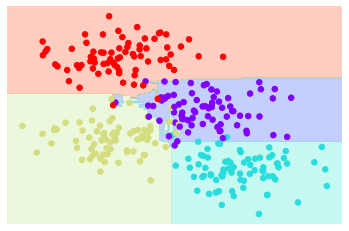

In [8]:
from sklearn.tree import DecisionTreeClassifier # 决策树
from sklearn.ensemble import BaggingClassifier # 装袋法

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, 
                        random_state=1)

visualize_classifier(bag, X, y)

#### 随机森林-分类

<ipython-input-5-eae00855de8b>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


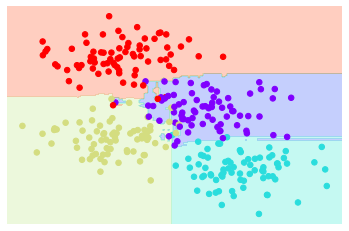

In [9]:
## 随机森林的决策边界，优化过的决策树集成算法
from sklearn.ensemble import RandomForestClassifier # 随机森林分类器

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X, y)

#### 随机森林-回归

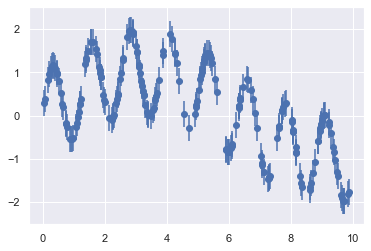

In [10]:
## 随机生成数据
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation

y = model(x)
plt.errorbar(x, y, 0.3, fmt="o")
plt.show()

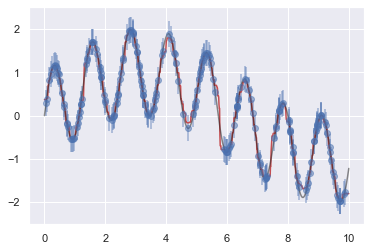

In [11]:
## 随机森林回归器
from sklearn.ensemble import RandomForestRegressor # 随机森林回归
forest = RandomForestRegressor(200)
forest.fit(x[:,None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5)
plt.show()

### 案例：手写数字识别

In [12]:
## 导入数据
from sklearn.datasets import load_digits # 手写数字数据
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

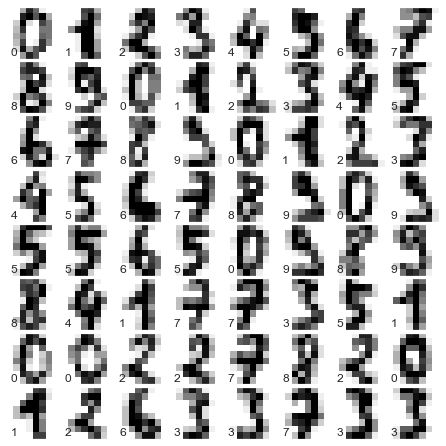

In [13]:
## 显示前几个数字图像，看看分类的对象
# 设置图形对象
fig = plt.figure(figsize=(6,6)) # 以英寸为单位
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
# 画数字：每个数字是8像素×8像素
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # 用target值给图像作标注
    ax.text(0, 7, str(digits.target[i]))

In [19]:
## 构建随机森林分类器
from sklearn.model_selection import train_test_split # 交叉验证

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
## 查看分类结果报告
from sklearn import metrics # 分类结果
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.98      0.99        44
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



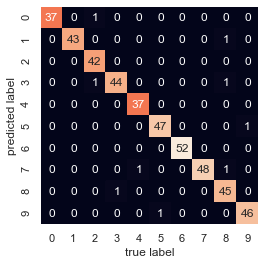

In [23]:
## 绘制混淆矩阵
from sklearn.metrics import confusion_matrix # 混淆矩阵
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()

### 总结
- 优点
    - 训练、预测速度快，多任务可以直接并行计算。
    - 多棵树可以进行概率分类：多个评估器之间的多数投票可以给出概率的估计值（使用 Scikit-Learn 的 predict_proba() 方法）。
    - 无参数模型很灵活，在其他评估器都欠拟合的任务中表现突出。
- 缺点
    - 结果难以解释。，如果你想要总结分类模型的意义，随机森林可能不是最佳选择。

## 主成分分析（principal component analysis, PCA）
PCA 是应用最广泛的无监督算法之一，是一种基础的降维算法，尤其适用于数据可视化、噪音过滤、特征抽取和特征工程等领域。

In [1]:
%matplotlib inline
import numpy as np # 数值计算
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set()

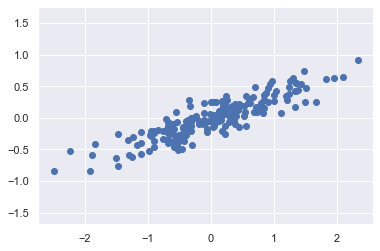

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis("equal")
plt.show()

### 选择主成分

In [3]:
from sklearn.decomposition import PCA # 主成分分析
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

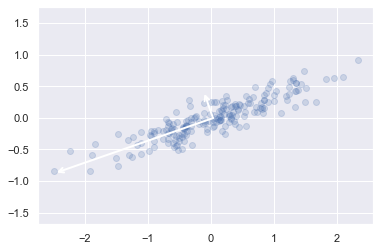

In [4]:
## 数据中主轴的可视化
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# 画出数据
plt.scatter(X[:, 0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()

- 数据主轴的变换

<img style="float: center;" src=".\figures\数据主轴的变换.jpg" width="60%">
<center>Fig. 数据主轴的变换</center>


In [5]:
## 使用 PCA 降维
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:", X.shape)
print("transformed shape:", X_pca.shape)


original shape: (200, 2)
transformed shape: (200, 1)


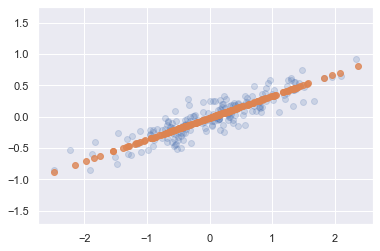

In [6]:
## PCA 降维的可视化
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2) # 原始数据
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8) # 投影数据
plt.axis('equal')
plt.show()

In [7]:
## 导入数据
from sklearn.datasets import load_digits # 手写数据
digits = load_digits()
digits.data.shape

(1797, 64)

In [8]:
## 将数据（64维）投影到二维
pca = PCA(2) # 从 64 维投影到 2 维
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


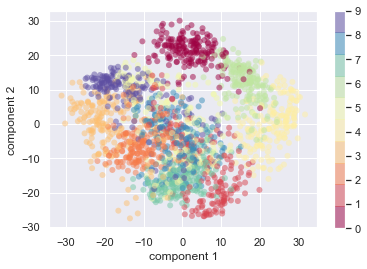

In [9]:
## 画出每个点的前两个主成分
plt.scatter(projected[:,0], projected[:,1], 
            c=digits.target, edgecolor="none", alpha=0.5, 
            cmap=plt.cm.get_cmap("Spectral", 10))
plt.xlabel("component 1")
plt.ylabel("component 2")
plt.colorbar()
plt.show()

- 可以将**累计方差贡献率**看作是关于成分数量的函数，从而确定所需成分的数量

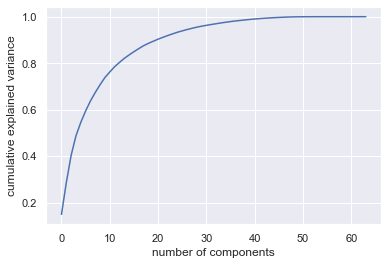

In [10]:
## 累计方差贡献率
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative explained variance")
plt.show()

可以看到前 10 个成分包含了几乎 75% 的方差。  
如果你希望描述接近 100% 的方差，那么就需要大约 50 个成分。  

### 过滤噪声

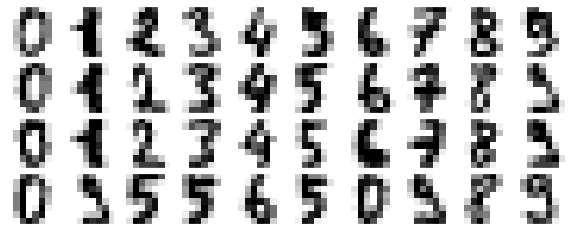

In [11]:
## 画出几个无噪音的输入数据
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

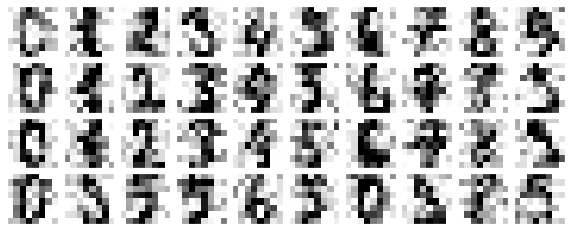

In [12]:
## 添加一些随机噪音并创建一个噪音数据集，重新画图
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

In [13]:
## 用噪音数据训练一个 PCA，要求投影后保存 50% 的方差
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

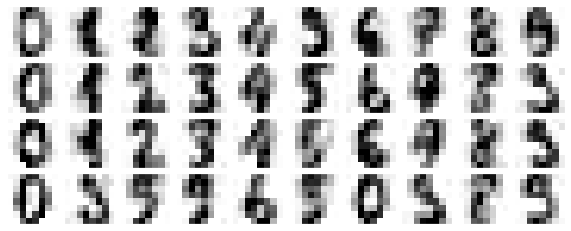

In [14]:
## 利用逆变换重构过滤后的手写数字
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

> - 信号保/噪音过滤的性质 PCA 成为一种非常有用的特征选择方式  
> - 例如，与其在很高维的数据上训练分类器，你可以选择在一个低维表示中训练分类器，该分类器将自动过滤输入数据中的随机噪音。  

### 案例：特征脸

In [48]:
## import datasets
from sklearn.datasets import fetch_lfw_people # 人脸数据
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [49]:
## 观察前 150 个成分
from sklearn.decomposition import PCA # 主成分分析
pca = PCA(n_components=150, svd_solver="randomized")
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

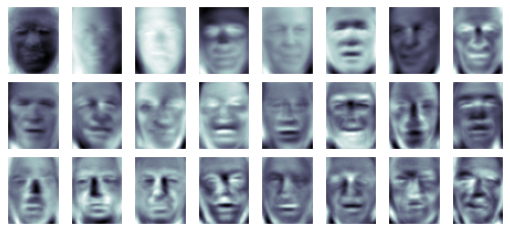

In [50]:
## 从 LFW 数据集中学习特征脸的可视化
fig, axes = plt.subplots(3, 8, figsize=(9,4), 
                         subplot_kw={"xticks":[], "yticks":[]}, 
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap="bone")

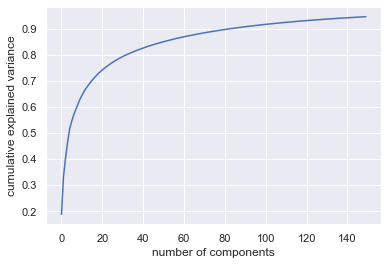

In [51]:
## PCA 投影的累积方差贡献率
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [53]:
# 计算成分和投影的人脸
pca = PCA(150, svd_solver="randomized").fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

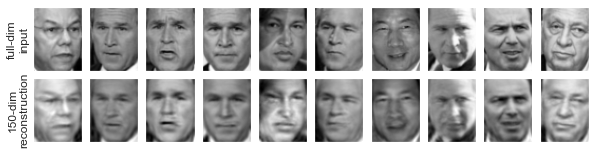

In [54]:
# 画出结果
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')
plt.show()

虽然它将数据的原始维度信息缩减了将近 20 倍，但是投影数据还是包含了足够的信息，使我们可以通过肉眼识别出图像中的人物。这说明我们的分类算法只需要在 150 维的数据上训练，而不需要在 3000 维的数据上训练。维度的选择取决于选定的算法，而选择合适的算法会带来更有效的分类效果。

### 总结
- 优点
    - PCA 用途广泛、可解释性强。主成分分析可用于降维、高维数据的可视化、噪音过滤，以及高维数据的特征选择。
    - 对于任意高维的数据集，建议先进行 PCA ，可视化点间的关系（手写数字示例中的处理方式），理解数据中的主要方差（特征脸示例中的处理方式），理解固有的维度（通过画出解释方差比）。
- 缺点
    - 易受数据集的异常点影响。

## 流形学习（manifold learning）
当你思考流形时，建议你设想有一张纸——一个存在于我们所熟悉的三维世界中的二维物体——它可以从两个维度弯折或卷起。提到流形学习这个术语时，可以把这张纸看成那个嵌入三维空间中二维流形。  
在三维空间中旋转、重定向或者伸展这张纸，都不会改变它的平面几何特性：这些操作和线性嵌入类似。如果你弯折、卷曲或者弄皱这张纸，它仍然是一个二维流形，但是嵌入到一个三维空间就不再是线性的了。流形学习算法将试图学习这张纸的二维特征，包括将纸弯曲后放入一个三维空间中。  
- 流形方法
    - 多维标度法（nultidimensional scaling, MDS）
    - 局部线性嵌入法（locally linear embedding, LLE）
    - 保距映射法（isometric mapping, Isomap）

In [1]:
## import packages
%matplotlib inline
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set()
import numpy as np # 数值计算

In [2]:
## 生成用于流形学习的数据
def make_love(N=1000, rseed=42):
    # 画出“HELLO”文字形状的图像，并保存成PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'LOVE', va='center', ha='center', weight='bold', size=85)
    fig.savefig(".\\output\\love.png")
    plt.close(fig)
    
    # 打开这个 PNG，并将一些随机点画进去
    from matplotlib.image import imread
    data = imread(".\\output\\love.png")[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i,j] < 1)
    X = X[mask]
    X[:,0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:,0])]

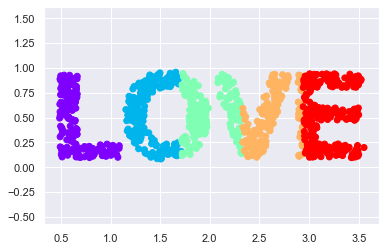

In [3]:
X = make_love(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal')
# plt.show()
plt.savefig(".\\output\\creat_love.png")

### 多维标度法（MDS）

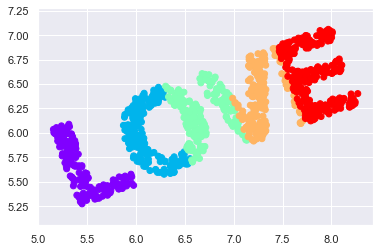

In [4]:
## 旋转数据
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
    [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)

X2 = rotate(X, 20) + 5
plt.scatter(X2[:,0], X2[:,1], **colorize)
plt.axis('equal')
plt.show()

如果用一个旋转矩阵来旋转数据，$x$ 和 $y$ 的值将会改变，但是数据形状基本还是一样的。这说明 $x$ 和 $y$ 的值并不是数据间关系的必要基础特征。这个例子中真正的基础特征是每个点与数据集中其他点的距离。表示这种关系的常用方法是关系（距离）矩阵：对于 $N$ 个点，构建一个 $N*N$ 的矩阵，元素 $(i,j)$ 是点 $i$ 和点 $j$ 之间的距离。我们用 Scikit-Learn 中的 pairwise_distances 函数来计算原始数据的关系矩阵。

In [5]:
## 关系矩阵
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

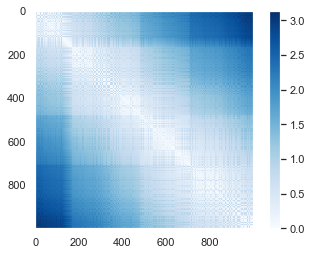

In [6]:
## 绘制关系矩阵
plt.imshow(D, zorder=2, cmap="Blues", interpolation="nearest")
plt.colorbar()
plt.show()

In [7]:
## 旋转前后的数据集，关系矩阵不变
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

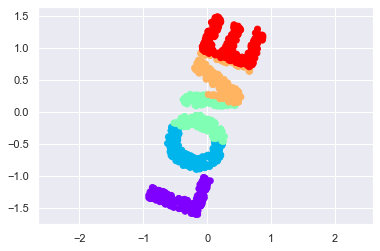

In [8]:
## 从成对距离计算 MDS 嵌入
from sklearn.manifold import MDS # 多维标度法
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')
plt.show()

In [9]:
## 将数据集投影到三维
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])

X3 = random_projection(X, 3)
X3.shape

(1000, 3)

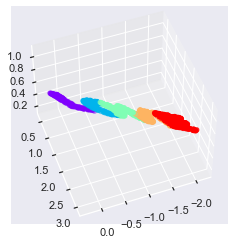

In [10]:
## 可视化线性嵌入三维空间的数据
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

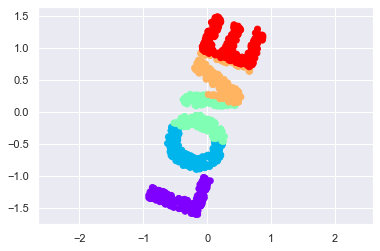

In [11]:
## 用 MDS 模型处理三维数据，还原了旋转和变形的输入数据形状
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:,0], out3[:,1], **colorize)
plt.axis('equal')
plt.show()

- 非线性嵌入：MDS 适用于线性变换；非线性变化使用

In [12]:
## 将输入数据在三维空间中扭曲成“S”形状
def make_love_s_curve(X):
    t = (X[:,0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:,1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_love_s_curve(X)

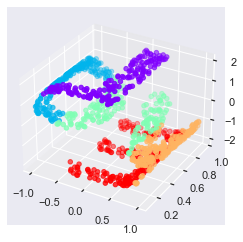

In [13]:
## 数据非线性地嵌入三维空间中
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize)
plt.show()

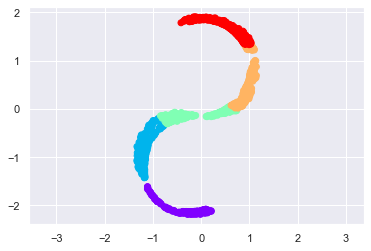

In [14]:
## 将 MDS 算法应用于非线性数据时无法还原其内部结构
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:,0], outS[:,1], **colorize)
plt.axis('equal')
plt.show()

### 局部线性嵌入（LLE）

- MDS 算法和 LLE 算法表示点间距离的差异

<img style="float: center;" src=".\figures\MDS算法和LLE算法表示点间距离的差异.jpg" width="60%">
<center>Fig. MDS 算法和 LLE 算法表示点间距离的差异</center>


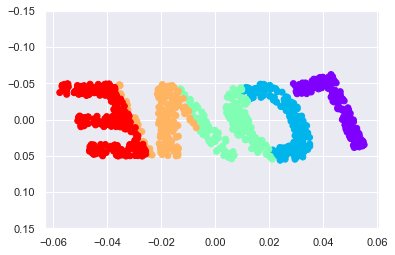

In [15]:
## 局部线性嵌入可以从非线性嵌入数据中恢复潜在数据特征
from sklearn.manifold import LocallyLinearEmbedding # 局部线性嵌入
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method="modified", 
                               eigen_solver="dense")
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)
plt.show()

- 流形方法 vs. PCA
    - 缺点
        - 在流形学习中，并没有好的框架来处理缺失值。相比之下， PCA 算法中有一个用于处理缺失值的迭代方法。
        - 在流形学习中，数据中噪音的出现将造成流形“短路”，并且严重影响嵌入结果。相比之下， PCA 可以自然地从最重要的成分中滤除噪音。
        - 流形嵌入的结果通常高度依赖于所选取的邻节点的个数，并且通常没有确定的定量方式来选择最优的邻节点个数。相比之下， PCA 算法中并不存在这样的问题。
        - 在流形学习中，全局最优的输出维度数很难确定。相比之下， PCA 可以基于解释方差来确定输出的维度数。
        - 在流形学习中，嵌入维度的含义并不总是很清楚；而 PCA 算法中，主成分有非常明确的含义。
        - 在流形学习中，流形方法的计算复杂度 $O[N^2]$ 或 $O[N^3]$。 PCA 可以选择随机方法，通常速度更快（详情请参 megaman 程序包中的一些具有可扩展能力的流形学习实现）。
    - 优点
        - 流形学习具有保留数据中的非线性关系的能力。因此，通常的做法是：先 PCA 探索数据的线性特征，再用流形方法探索数据的非线性特征。

- 关于流形方法的几点建议
    - LLE 在 sklearn.manifold.LocallyLinearEmbedding 中实现。它对于简单问题，例如前面介绍过 S 曲线、局部线性嵌入（LLE）及其变体（特别是 modified LLE）的学习效果非常好。
    - Isomap 在 sklearn.manifold.Isomap 中实现。虽然 LLE 通常对现实世界的高维数据源的学习效果比较差，但 Isomap 算法往往会获得比较好的嵌入效果。
    - t-分布邻域嵌入算法（t-distributed stochastic neighbor embedding，t-SNE）在 sklearn.manifold.TSNE 中实现。将它用于高度聚类的数据效果比较好，但是该方法比其他方法学习速度慢。

### 案例：Isomap 处理人脸数据

In [18]:
## import datasets
from sklearn.datasets import fetch_lfw_people # 人脸数据
faces = fetch_lfw_people(min_faces_per_person=30)
faces.data.shape

(2370, 2914)

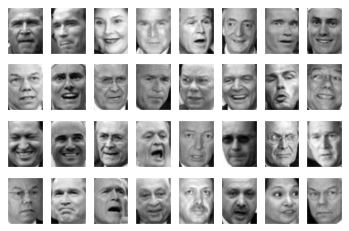

In [23]:
## 可视化待处理的数据
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap="gray")

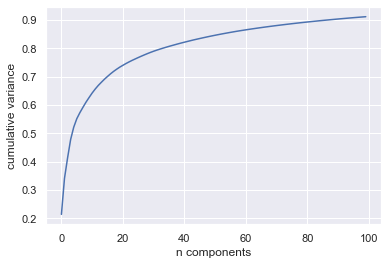

In [26]:
## PCA 投影的累积方差贡献率
from sklearn.decomposition import PCA
model = PCA(100, svd_solver="randomized").fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance')
plt.show()

大约需要 100 个成分才能保存 90% 的方差，说明该数据所需的维度非常高，仅通过几个线性成分无法描述。  
由于存在上述问题，因此非线性流形嵌入方法，如LLE 和Isomap，就可以派上用场了。  

In [27]:
## 对人脸数据计算 Isomap 嵌入
from sklearn.manifold import Isomap # 保距映射法
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

In [29]:
## 在不同的投影位置输出图像的缩略图
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # 不展示相距很近的点
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

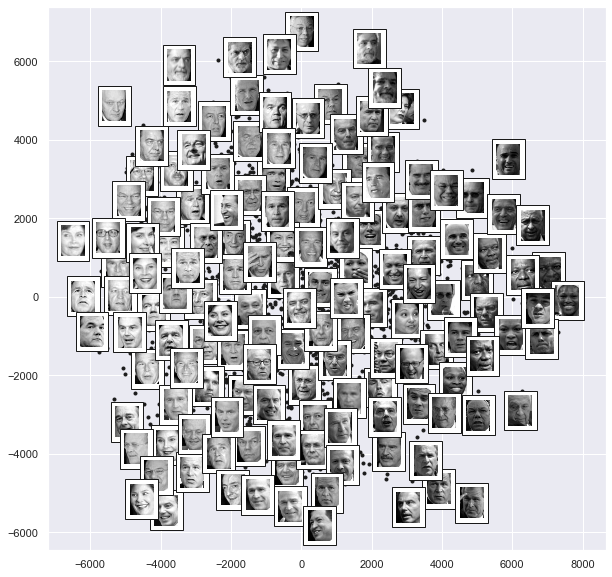

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data, 
                model=Isomap(n_components=2), 
                images=faces.images[:,::2,::2])

### 案例：手写数字的可视化结构

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("MINST original")
mnist.data.shape

c:\programdata\miniconda3\lib\site-packages\sklearn\datasets\_openml.py:65: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


InvalidURL: URL can't contain control characters. '/api/v1/json/data/list/data_name/minst original/limit/2/status/active/' (found at least ' ')

## k-means 聚类

### k-means 基础假设
- “簇中心点”（cluster center）是属于该簇的所有数据点坐标的算术平均值。
- 一个簇的每个点到该簇中心点的距离，比到其他簇中心点的距离短。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set() # 绘图风格
import numpy as np # 数值计算

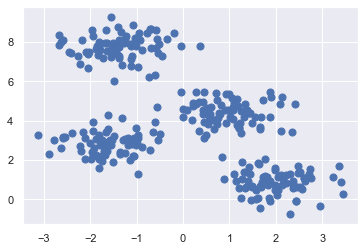

In [2]:
## import datasets
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, 
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

In [3]:
## k-means 聚类
from sklearn.cluster import KMeans # k-means 聚类
kmeans = KMeans(n_clusters=4) # 选择 4 个聚类中心
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

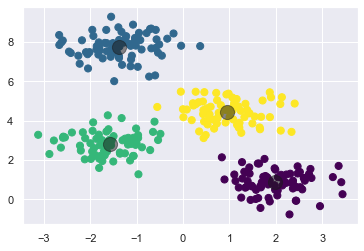

In [4]:
## k-means 簇中心点和用不同颜色区分的簇
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap="viridis")

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="k", s=200, alpha=0.5)
plt.show()

### 期望最大化（expectation-maximization, E-M）

<img style="float: center;" src=".\figures\k-means的E–M算法的可视化.jpg" width="70%">
<center>Fig. k-means 的 E–M 算法的可视化</center>


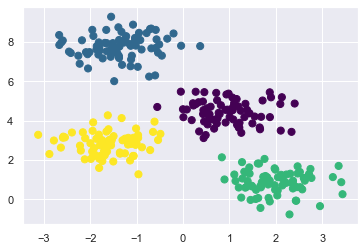

In [5]:
## k-means 算法实现
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. 随机选择簇中心点
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. 基于最近的中心指定标签
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. 根据点的平均值找到新的中心
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        # 2c. 确认收敛
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=labels, s=50, cmap="viridis")
plt.show()

### k-means 的一些缺陷
- 可能不会达到全局最优结果
- 簇数量必须事先定好
- 只能确定线性聚类边界：核化（kernel）
- 当数据量较大时，k-means 会很慢：批处理（batch-based）

- 可能不会达到全局最优结果

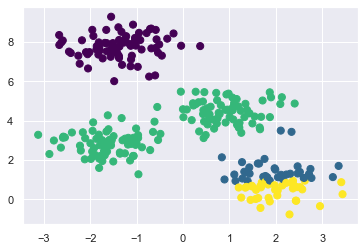

In [6]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:,0], X[:,1], c=labels, 
            s=50, cmap="viridis")
plt.show()

- 簇数量必须事先定好

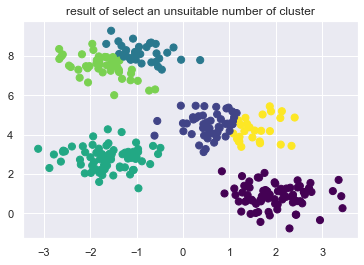

In [7]:
## 簇数量取值不合适的结果
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, 
            s=50, cmap="viridis")
plt.title("result of select an unsuitable number of cluster")
plt.show()

- k-means 算法只能确定线性聚类边界

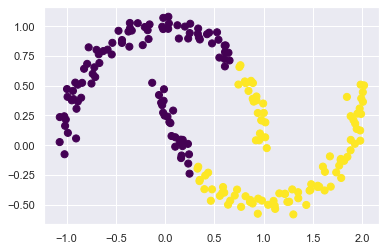

In [8]:
## k-means 算法聚类非线性边界失败
from sklearn.datasets import make_moons # 
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, 
            s=50, cmap="viridis")
plt.show()

### 核 k-means

c:\programdata\miniconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


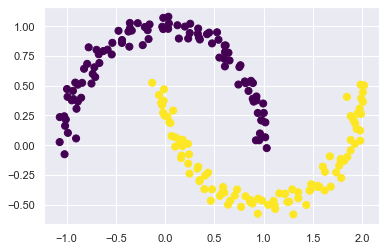

In [9]:
## 核化的 k-means 算法
from sklearn.cluster import SpectralClustering # 核 k-means
model = SpectralClustering(n_clusters=2, 
                           affinity="nearest_neighbors", 
                           assign_labels="kmeans")
labels = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, 
            s=50, cmap="viridis")
plt.show()

- 当数据量较大时，k-means 会很慢  
由于 k-means 的每次迭代都必须获取数据集所有的点，因此随着数据量的增加，算法会变得缓慢。将“每次迭代都必须使用所有数据点”这个条件放宽，例如每一步仅使用数据集的一个子集来更新簇中心点，就是批处理（batch-based）k-means 算法的核心思想。  

### 案例：手写数字

In [13]:
## import datasets
from sklearn.datasets import load_digits # 手写数字
digits = load_digits()
digits.data.shape

(1797, 64)

In [14]:
## k-means 聚类
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

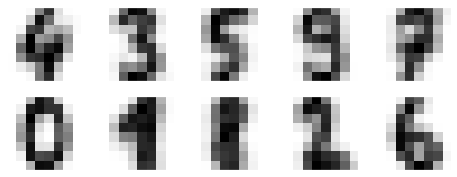

In [16]:
## 用 k-means 算法得到的簇中心点
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation="nearest", cmap=plt.cm.binary)
plt.show()

In [18]:
## 将每个学习到的簇标签和真实标签进行匹配
from scipy.stats import mode # 

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [19]:
## 查准率
from sklearn.metrics import accuracy_score # 准确率
accuracy_score(digits.target, labels)

0.7935447968836951

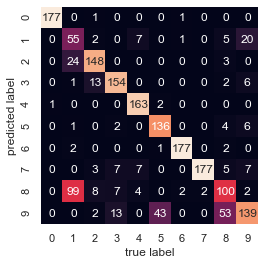

In [20]:
## 绘制 k-means 分类器的混淆矩阵
from sklearn.metrics import confusion_matrix # 混淆矩阵
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, 
            xticklabels=digits.target_names, 
            yticklabels=digits.target_names)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.show()

### t - 分布邻域嵌入算法
使用 t - 分布邻域嵌入算法在执 k-means 之前对数据进行预处理。  
t-SNE 是一个非线性嵌入算法，特别擅长保留簇中的数据点。  

In [24]:
from sklearn.manifold import TSNE # t - 分布邻域嵌入

# 投影数据
tsne = TSNE(n_components=2, init="pca", random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# 计算类
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# 排列标签
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
# 计算准确度
accuracy_score(digits.target, labels)

0.9443516972732332

### 案例：色彩压缩

(427, 640, 3)


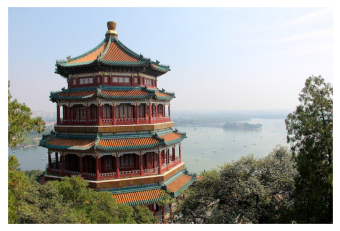

In [29]:
## import data
from sklearn.datasets import load_sample_image # 
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);
print(china.shape)

In [32]:
## 将这组像素转换成三维颜色空间中的一群数据点
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

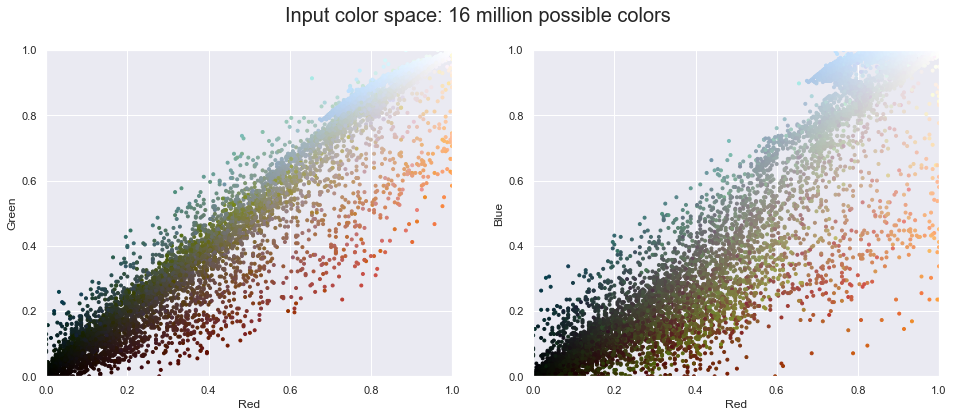

In [36]:
## 在 RGB 颜色空间中的像素分布（取前 10000 个）
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    # 随机选择一个子集
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker=".")
    ax[0].set(xlabel="Red", ylabel="Green", xlim=(0, 1), ylim=(0, 1))
    
    ax[1].scatter(R, B, color=colors, marker=".")
    ax[1].set(xlabel="Red", ylabel="Blue", xlim=(0, 1), ylim=(0, 1))
    
    fig.suptitle(title, size=20);
    
plot_pixels(data, title="Input color space: 16 million possible colors")

对像素空间（特征矩阵）使用 k-means 聚类，将 1600 万种颜色（255 × 255 × 255 = 16 581 375）缩减到 16 种颜色。  

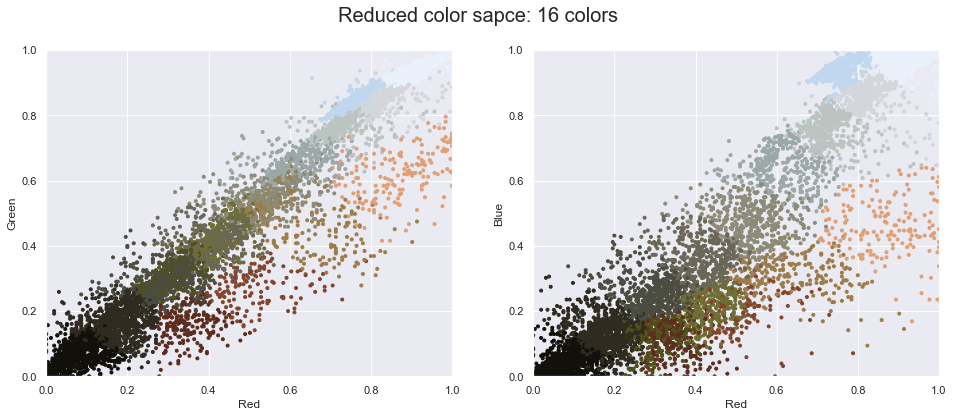

In [37]:
## 在 RGB 颜色空间中 16 个类
from sklearn.cluster import MiniBatchKMeans # 
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color sapce: 16 colors")

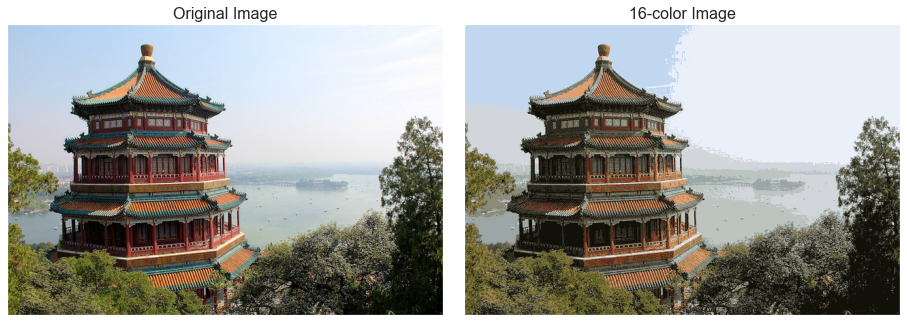

In [38]:
## 重新绘制图像
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

## 高斯混合模型（GMM）

### GMM vs. KMeans

In [1]:
## import packages
%matplotlib inline
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set() # 设置绘图风格
import numpy as np # 数值计算

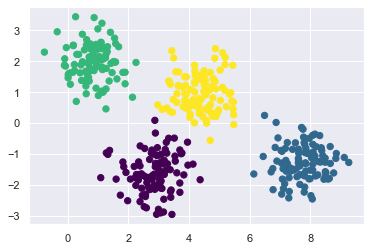

In [2]:
# 生成数据
from sklearn.cluster import KMeans # k-means
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, 
                       cluster_std=0.60, random_state=0)
X = X[:,::-1] # 交换列是为了方便画图

# 用 k-means 标签画出数据
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis")
plt.show()

通过直接观察可以发现，某些点的归属簇比其他点的归属簇更加明确。例如，中间的两个簇似乎有一小块区域重合，因此我们对重合部分的点将被分配到哪个簇不是很有信心。不幸的是，k-means 模型本身也没有度量簇的分配概率或不确定性的方法（虽然可以用数据重抽样方法 bootstrap 来估计不确定性）。因此，我们必须找到一个更通用的模型。  

### KMeans 的缺陷

In [3]:
## 可视化聚类模型
from sklearn.cluster import KMeans # k-means
from scipy.spatial.distance import cdist # 

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    
    # 画出输入数据
    ax = ax or plt.gca()
    ax.axis("equal")
    ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis", zorder=2)
    
    # 画出 k-means 模型表示
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() 
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=3, alpha=0.5, zorder=1))

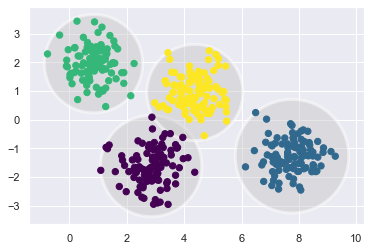

In [4]:
## k-means 模型隐含的圆形的簇
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

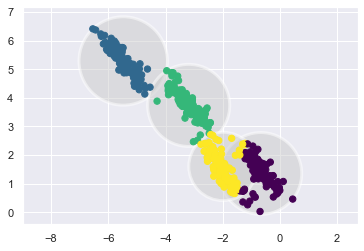

In [5]:
## k-means 算法对非圆形聚类效果很差
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)

k-means 的这两个缺点——类的形状缺少灵活性、缺少簇分配的概率——使得它对许多数据集（特别是低维数据集）的拟合效果不尽如人意。  

### 使用高斯混合模型

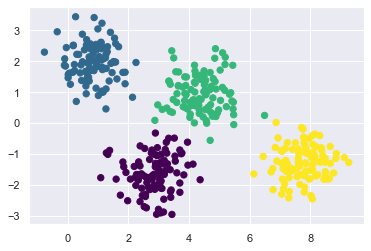

In [6]:
## 高斯混合模型得到的数据标签
from sklearn.mixture import GaussianMixture as GMM # 高斯混合模型
gmm = GMM(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:,0], X[:,1], c=labels, s=40, cmap="viridis")
plt.show()

In [7]:
## 簇分配的概率结果
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    0.    0.537 0.463]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]]


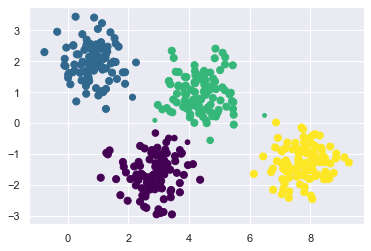

In [8]:
## GMM 概率标签：用点的大小反映概率
size = 50 * probs.max(1) ** 2 # 平方强调差异
plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=size)
plt.show()

### 高斯混合模型算法步骤

- 选择初始簇的中心位置和形状。
- 重复直至收敛。
    - 期望步骤（E-step）：为每个点找到对应每个簇的概率作为权重。
    - 最大化步骤（M-step）更新每个簇的位置，将其标准化，并且基于所有数据点的权重来确定形状。

In [9]:
## 可视化 GMM 簇位置和形状的函数
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """用给定的位置和协方差画一个椭圆"""
    ax = ax or plt.gca()
    
    # 将协方差转换成主轴
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1,0], U[0,0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # 画出椭圆
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:,0], X[:,1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w*w_factor)

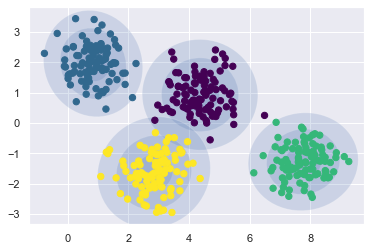

In [10]:
gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

高斯模型允许使用全协方差（full covariance），即使是于非常扁平的椭圆形的簇，该模型也可以处理。

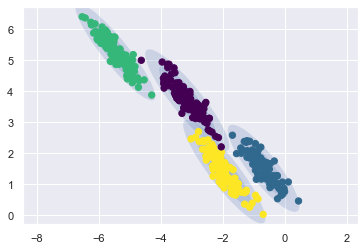

In [11]:
gmm = GMM(n_components=4, covariance_type="full", random_state=42)
plot_gmm(gmm, X_stretched)

- 适当选择协方差类型（covariance_type）
    - "diag"：簇在每个维度的尺寸都可以单独设置，椭圆边界的主轴与坐标轴平行
    - "spherical"：约束簇的形状，让所有维度相等
    - "full"：适合高维模型，允许每个簇在任意方向上用椭圆建模
    
<img style="float: center;" src=".\figures\GMM协方差类型的可视化.jpg" width="80%">
<center>Fig. GMM 协方差类型的可视化</center>


### GMM 密度估计
GMM 通常被归类为聚类算法，但它本质上是一个密度估计算法；  
从技术的角度考虑，GMM 拟合的结果并不是一个聚类模型，而是描述数据分布的生成概率模型。  

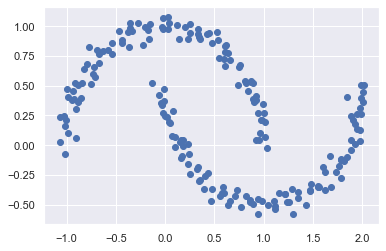

In [12]:
## import datasets
from sklearn.datasets import make_moons #
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:,0], Xmoon[:,1])
plt.show()

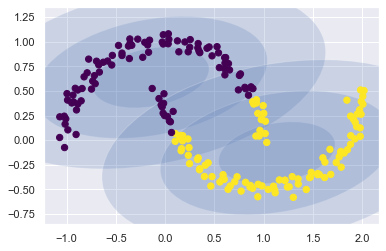

In [13]:
## 用带两个成分的 GMM 拟合非线性的类
gmm2 = GMM(n_components=2, covariance_type="full", random_state=0)
plot_gmm(gmm2, Xmoon)

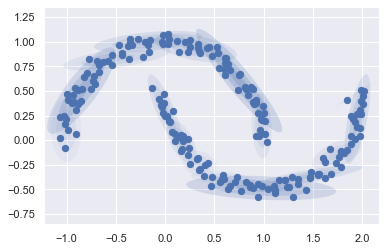

In [14]:
## 用很多 GMM 簇来对点的分布建模
gmm16 = GMM(n_components=16, covariance_type="full", random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

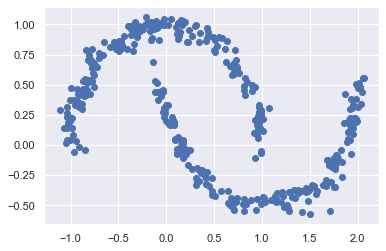

In [15]:
Xnew = gmm16.sample(400)[0]
plt.scatter(Xnew[:,0], Xnew[:,1]);

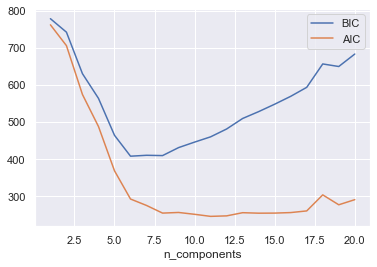

In [16]:
## AIC 和 BIC 选择 GMM 成分数量的可视化
n_components = np.arange(1, 21)
models = [GMM(n, covariance_type="full", random_state=0).fit(Xmoon) 
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label="BIC")
plt.plot(n_components, [m.aic(Xmoon) for m in models], label="AIC")
plt.legend(loc="best")
plt.xlabel("n_components");

In [27]:
## import datasets
from sklearn.datasets import load_digits # 手写数字
digits = load_digits()
digits.data.shape

(1797, 64)

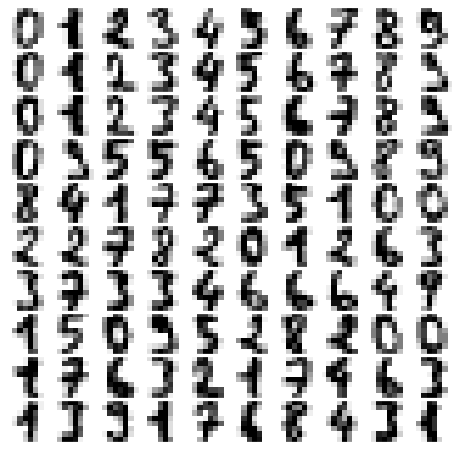

In [28]:
## 画出前100 个数据，看看这些数据
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8), 
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap="binary")
        im.set_clim(0, 16)
        
plot_digits(digits.data)

使用 PCA 降维，保留 99% 的方差

In [29]:
## PCA 降维
from sklearn.decomposition import PCA # 主成分分析
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape

(1797, 41)

结果降到了 41 维，削减了接近 1/3 的维度的同时，几乎没有信息损失。再对这个投影数据使用 AIC，从而得到 GMM 成分数量的粗略估计。  

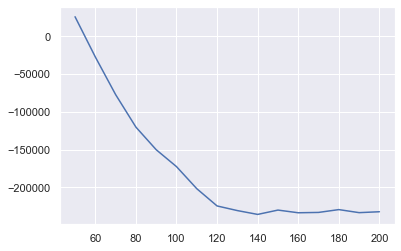

In [30]:
## 用 AIC 曲线选择合适数量的 GMM 成分
n_components = np.arange(50, 210, 10)
models = [GMM(n, covariance_type="full", random_state=0) 
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [31]:
## 确认收敛
gmm = GMM(140, covariance_type="full", random_state=0)
gmm.fit(data)
print(gmm.converged_)

True


In [33]:
## GMM 生成模型
data_new = gmm.sample(100)[0]
data_new.shape

(100, 41)

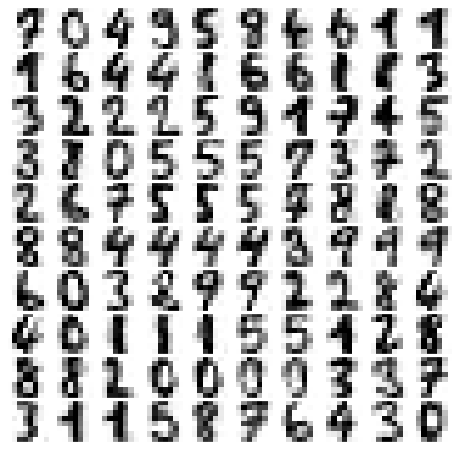

In [34]:
## GMM 评估器模型随机画出的“新”数字
digits_new = pca.inverse_transform(data_new)
plot_digits(digits_new)

生成模型是贝叶斯生成分类器的一个非常有用的成分

## 核密度估计

### 由来：直方图

In [1]:
## import packages
%matplotlib inline
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set() # 设置绘图风格
import numpy as np # 数值计算

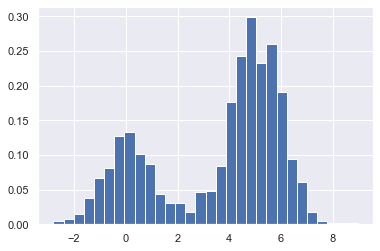

In [2]:
## 生成数据
def make_data(N=1000, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)
hist = plt.hist(x, bins=30, density=True)

In [3]:
## 检查标准化结果
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

In [4]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

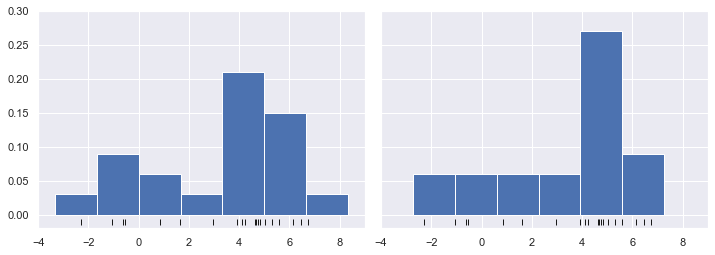

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), 
                       sharex=True, sharey=True, 
                       subplot_kw={"xlim": (-4, 9), 
                                   "ylim": (-0.02, 0.3)})

fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins+offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), "|k", 
               markeredgewidth=1)

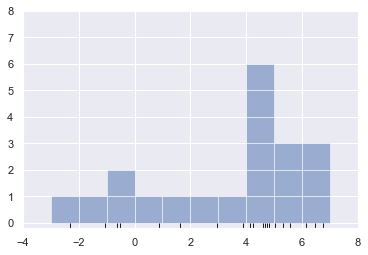

In [6]:
## 方块堆叠的直方图
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), "|k", 
        markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, 
                                   alpha=0.5))
    ax.set_xlim(-4, 8)
    ax.set_ylim(-0.2, 8)

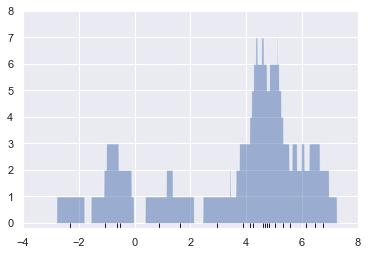

In [7]:
## 每个点的块中心的“直方图”
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), "|k", markeredgewidth=1)

plt.axis([-4, 8, -0.2, 8]);

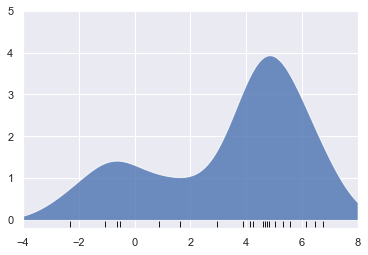

In [8]:
## 用高斯内核实现的核密度估计
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

plt.fill_between(x_d, density, alpha=0.8)
plt.plot(x, np.full_like(x, -0.1), "|k", markeredgewidth=1)

plt.axis([-4, 8, -0.2, 5]);

这幅平滑的图像是由每个点所在位置的高斯分布构成的，这样可以更准确地表现数据分布的形状，并且拟合方差更小（也就是说，进行不同的抽样时，数据的改变更小）。  

### KDE 的应用

(-0.02, 0.22)

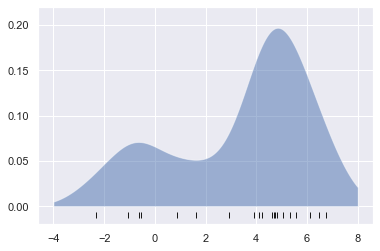

In [9]:
## Scikit-Learn 的 KernelDensity 评估器
from sklearn.neighbors import KernelDensity # 核密度估计

# 初始化并拟合 KDE 模型
kde = KernelDensity(bandwidth=1.0, kernel="gaussian")
kde.fit(x[:,None])

# score_samples 返回概率密度的对数值
logprob = kde.score_samples(x_d[:,None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), "|k", markeredgewidth=1)
plt.ylim(-0.02, 0.22)

- 通过交叉检验选择带宽  
KDE 中，带宽的选择不仅对找到合适的密度估计非常重要，也是在密度估计中控制偏差-方差平衡的关键：  
带宽过窄将导致估计呈现高方差（即过拟合），而且每个点的出现或缺失都会引起很大的不同；  
带宽过宽将导致估计呈现高偏差（即欠拟合），而且带宽较大的核还会破坏数据结构。  

In [10]:
from sklearn.model_selection import GridSearchCV # 网格搜索
from sklearn.model_selection import LeaveOneOut # 留一法

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:,None]);

In [11]:
# 似然估计值最大化时的带宽
grid.best_params_

{'bandwidth': 1.1233240329780276}

### 案例：球形空间的 KDE

In [12]:
## import datasets
from sklearn.datasets import fetch_species_distributions # 南美洲哺乳动物地理分布数据

data = fetch_species_distributions()

# 获取物种的 ID 和位置矩阵/数组
latlon = np.vstack([data.train["dd lat"], 
                    data.train["dd long"]]).T
species = np.array([d.decode("ascii").startswith("micro") 
                    for d in data.train["species"]], dtype="int")

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [13]:
## 在训练数据集中画出物种位置
from mpl_toolkits.basemap import Basemap # 地理数据可视化
from sklearn.datasets.species_distributions import construct_grid

xgrid, ygrid = construct_grid(data)

# 用 Basemap 画出海岸线
m = Basemap(projection="cyl", resolution="c", 
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(), 
            llcrnrlat=xgrid.min(), urcrnrlat=xgrid.max(), )
m.drawmapboundary(fill_color="#DDEEFF")
m.fillcontinents(color="#FFEEDD")
m.drawcoastlines(color="gray", zorder=2)
m.drawcountries(color="gray", zorder=2)

# 画出位置
m.scatter(latlon[:,1], latlon[:,0], zorder=3, 
          c=species, cmap="rainbow", latlon=True);

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [ ]:
## 物种分布的核密度表示
# 准备画轮廓图的数据点
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()
xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = np.radians(xy[land_mask])

# 创建两幅并排的图
fig, ax = plt.subplots(1, 2)
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']
cmaps = ['Purples', 'Reds']

for i, axi in enumerate(ax):
    axi.set_title(species_names[i])
    
    # 用 Basemap 画出海岸线
    m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                urcrnrlat=Y.max(), llcrnrlon=X.min(),
                urcrnrlon=X.max(), resolution='c', ax=axi)
    m.drawmapboundary(fill_color='#DDEEFF')
    m.drawcoastlines()
    m.drawcountries()
    
    # 构建一个球形的分布核密度估计
    kde = KernelDensity(bandwidth=0.03, metric='haversine')
    kde.fit(np.radians(latlon[species == i]))

    # 只计算大陆的值：-9999 表示是海洋
    Z = np.full(land_mask.shape[0], -9999.0)
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # 画出密度的轮廓
    levels = np.linspace(0, Z.max(), 25)
    axi.contourf(X, Y, Z, levels=levels, cmap=cmaps[i])

In [16]:
from mpl_toolkits.basemap import Basemap

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 80 from PyObject

### 贝叶斯生成分类
- 通过标签分割训练数据。
- 为每个集合拟合一 KDE 来获得数据的生成模型，这样就可以用任意 $x$ 观察值和 $y$ 标签计算出似然估计值 $P(x|y)$。
- 根据训练集中每一类的样本数量，计算每一类的先验概率 $P(y)$。
- 对于一个未知的点 $x$，每一类的后验概率是 $P(x|y) \propto P(x|y)P(y)$，而后验概率最大的类就是分配给该点的标签。

In [17]:
from sklearn.base import BaseEstimator, ClassifierMixin


class KDEClassifier(BaseEstimator, ClassifierMixin):
    """基于 KDE 的贝叶斯生成分类
    
    参数
    ----------
    bandwidth : float
        每个类中的核带宽
    kernel : str
        核函数的名称，传递给 KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

In [25]:
## 计算交叉检验值
from sklearn.datasets import load_digits # 手写数字
from sklearn.model_selection import GridSearchCV # 网格搜索

digits = load_digits()

bandwidths = 10 ** np.linspace(0, 2, 100)
grid = GridSearchCV(KDEClassifier(), {"bandwidth":bandwidths})
grid.fit(digits.data, digits.target)

scores = [val for val in grid.cv_results_["mean_test_score"]]

{'bandwidth': 6.135907273413174}
accuracy = 0.9677298050139276


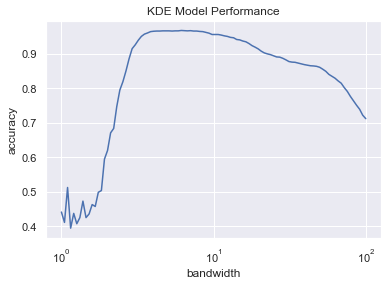

In [27]:
## 基于 KDE 的贝叶斯分类器验证曲线
plt.semilogx(bandwidths, scores)
plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.title('KDE Model Performance')
print(grid.best_params_)
print('accuracy =', grid.best_score_)

In [28]:
from sklearn.naive_bayes import GaussianNB # 高斯朴素贝叶斯
from sklearn.model_selection import cross_val_score # 交叉检验
cross_val_score(GaussianNB(), digits.data, digits.target).mean()

0.8069281956050759

- 继续改进的方法:  
    - 允许每一个类的带宽各不相同。  
    - 不用预测值优化带宽，而是基于训练数据中每一个类生成模型的似然估计值优化带宽（即使用 KernelDensity 的值，而不使用预测的准确值）。  

## 实战：人脸识别管道开发
真实世界的数据集通常都充满噪音和杂质，有的可能是缺少特征，有的可能是数据形式很难转换成整齐的 [n_samples, n_features] 特征矩阵。当你应用本章介绍的任何方法之前，都需要先从数据中提取特征。怎么提取特征这件事情并没有万灵药，只能靠数据科学家不断地磨炼直觉、积累经验。  

In [29]:
## import packages
%matplotlib inline
import matplotlib.pyplot as plt # 可视化
import seaborn as sns; sns.set() # 设置绘图风格
import numpy as np # 数值计算

### HOG（Histogram of Oriented Gradients，方向梯度直方图） 特征
- HOG 方法步骤：
    - 图像标准化（可选），消除照度对图像的影响。
    - 用与水平和垂直方向的亮度梯度相关的两个过滤器处理图像，捕捉图像的边、角和纹理信息。
    - 将图像切割成预定义大小的图块，然后计算每个图块内梯度方向的频次直方图。
    - 对比每个图块与相邻图块的频次直方图，并做标准化处理，进一步消除照度对图像的影响。
    - 获得描述每个图块信息的一维特征向量。

In [31]:
## 用 HOG 方法提取的图像特征可视化
from skimage import data, color, feature
import skimage.data

image = color.rgb2gray(data.chelsea())
hog_vec, hog_vis = feature.hog(image, visualise=True)

fig, ax = plt.subplots(1, 2, figsize=(12, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('input image')

ax[1].imshow(hog_vis)
ax[1].set_title('visualization of HOG features');

ModuleNotFoundError: No module named 'skimage'

- 构建人脸识别器的步骤：
    - 获取一组人脸图像缩略图，构建“正”（positive）训练样本。
    - 获取另一组人脸图像缩略图，构建“负”（negative）训练样本。
    - 提取训练样本的HOG 特征。
    - 对样本训练一个线性SVM 模型。
    - 为“未知”图像传递一个移动的窗口，用模型评估窗口中的内容是否是人脸。
    - 如果发现和已知图像重叠，就将它们组合成一个窗口。

- 获取一组正训练样本

In [32]:
from sklearn.datasets import fetch_lfw_people # 人脸数据
faces = fetch_lfw_people()
positive_patches = faces.images
positive_patches.shape

(13233, 62, 47)

- 获取一组负训练样本

In [33]:
from skimage import data, transform

imgs_to_use = ['camera', 'text', 'coins', 'moon',
               'page', 'clock', 'immunohistochemistry',
               'chelsea', 'coffee', 'hubble_deep_field']
images = [color.rgb2gray(getattr(data, name)())
          for name in imgs_to_use]

ImportError: cannot import name 'float_factorial' from 'scipy._lib._util' (c:\programdata\miniconda3\lib\site-packages\scipy\_lib\_util.py)

In [ ]:
from sklearn.feature_extraction.image import PatchExtractor

def extract_patches(img, N, scale=1.0, patch_size=positive_patches[0].shape):
    extracted_patch_size = tuple((scale * np.array(patch_size)).astype(int))
    extractor = PatchExtractor(patch_size=extracted_patch_size,
                               max_patches=N, random_state=0)
    patches = extractor.transform(img[np.newaxis])
    if scale != 1:
        patches = np.array([transform.resize(patch, patch_size)
                            for patch in patches])
    return patches

negative_patches = np.vstack([extract_patches(im, 1000, scale)
                              for im in images for scale in [0.5, 1.0, 2.0]])
negative_patches.shape

In [ ]:
## 没有人脸的负图像训练集
fig, ax = plt.subplots(6, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(negative_patches[500 * i], cmap='gray')
    axi.axis('off')

- 组合数据集并提取 HOG 特征

In [ ]:
from itertools import chain
X_train = np.array([feature.hog(im)
                    for im in chain(positive_patches,
                                    negative_patches)])
y_train = np.zeros(X_train.shape[0])
y_train[:positive_patches.shape[0]] = 1

In [ ]:
X_train.shape

这样，我们就获得了 43 000 个训练样本，每个样本有 1215 个特征。现在有了特征矩阵，就可以给 Scikit-Learn 训练了。

- 训练一个支持向量机

In [ ]:
## 首先，用简单的高斯朴素贝叶斯分类器算一个初始解
from sklearn.naive_bayes import GaussianNB # 高斯朴素贝叶斯
from sklearn.cross_validation import cross_val_score # 交叉检验

cross_val_score(GaussianNB(), X_train, y_train)

In [ ]:
## 再用支持向量机分类，用网格搜索获取最优的边界软化参数 C
from sklearn.svm import LinearSVC # 支持向量机
from sklearn.model_selection import GridSearchCV # 网格搜索
grid = GridSearchCV(LinearSVC(), {'C': [1.0, 2.0, 4.0, 8.0]})
grid.fit(X_train, y_train)
grid.best_score_

In [ ]:
grid.best_params_

In [ ]:
## 用最优的评估器重新训练数据集
model = grid.best_estimator_
model.fit(X_train, y_train)
LinearSVC(C=4.0, class_weight=None, dual=True,
          fit_intercept=True, intercept_scaling=1,
          loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2',
          random_state=None, tol=0.0001, verbose=0)

- 在新图像中寻找人脸

In [ ]:
test_image = skimage.data.astronaut()
test_image = skimage.color.rgb2gray(test_image)
test_image = skimage.transform.rescale(test_image, 0.5)
test_image = test_image[:160,40:180]

plt.imshow(test_image, cmap='gray')
plt.axis('off');

In [ ]:
## 创建一个不断在图像中移动的窗口，然后计算每次移动位置 HOG 特征
def sliding_window(img, patch_size=positive_patches[0].shape,
                   istep=2, jstep=2, scale=1.0):
    Ni, Nj = (int(scale * s) for s in patch_size)
    for i in range(0, img.shape[0] - Ni, istep):
        for j in range(0, img.shape[1] - Ni, jstep):
            patch = img[i:i + Ni, j:j + Nj]
            if scale != 1:
                patch = transform.resize(patch, patch_size)
            yield (i, j), patch
            
indices, patches = zip(*sliding_window(test_image))
patches_hog = np.array([feature.hog(patch) for patch in patches])
patches_hog.shape

In [ ]:
## 收集这些 HOG 特征，并用训练好的模型来评估每个窗口中是否有人脸
labels = model.predict(patches_hog)
labels.sum()

In [ ]:
## 用矩形把收集到的信息画在图像上
fig, ax = plt.subplots()
ax.imshow(test_image, cmap='gray')
ax.axis('off')

Ni, Nj = positive_patches[0].shape
indices = np.array(indices)

for i, j in indices[labels == 1]:
    ax.add_patch(plt.Rectangle((j, i), Nj, Ni, edgecolor='red',
                               alpha=0.3, lw=2, facecolor='none'))

### 改进人脸识别管道